<a href="https://colab.research.google.com/github/Gi-Woong/SDA-TeamProject/blob/main/SDA_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns

# 테마 설정
sns.set_theme()

# 브라우저에서 바로 그려지도록(colab)
%matplotlib inline

# 그래프에 retina format 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# sns.set() 쓰지 말것! -> 폰트 지정 옵션 초기화돼서 한글폰트 깨짐

# 데이터 불러오기 및 사전 처리

- 사용 데이터
    - 재정 자립도
    - 재정 자주도
- 기타 고려 변수
    - 과징금 및 과태료

DataFrame 변수 명
 
- df1: 서울시 구별 조사망률 및 사망건수(2015~2021)
- df2: 일반회계 세입결산(과태료 및 과징금)(2015~2021)
- df3: 서울시 구별 재정자립도
- df4: 서울시 구별 재정자주도

In [ ]:
def read_excel(url, **kwargs):
    return pd.read_excel(url, engine='openpyxl', header=None, **kwargs)

# 서울시 구별 조사망률
df_1 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%82%AC%EB%A7%9D%EB%A5%A0%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 서울시 구별 재정자립도
df_3 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EB%A6%BD%EB%8F%84.xlsx?raw=true")
# 서울시 구별 재정자주도
df_4 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EC%A3%BC%EB%8F%84.xlsx?raw=true")

# EDA 및 데이터 전처리

### 서울시 구별 조사망률 및 사망건수

In [ ]:
df_1.head()

0        1     2     3     4     5     6     7     8     9     10  \
0      NaN     자치구별  2015  2015  2016  2016  2017  2017  2018  2018  2019   
1  자치구별(1)  자치구별(2)  사망건수  조사망률  사망건수  조사망률  사망건수  조사망률  사망건수  조사망률  사망건수   
2       합계      종로구   829   5.5   823   5.5   826   5.6   897     6   854   
3      NaN       중구   689   5.6   669   5.5   684   5.7   710   5.8   665   
4      NaN      용산구  1113   4.9  1137   5.1  1150   5.2  1203   5.5  1107   

     11    12    13    14    15  
0  2019  2020  2020  2021  2021  
1  조사망률  사망건수  조사망률  사망건수  조사망률  
2   5.8   867     6   982   6.9  
3   5.5   723   5.9   806   6.7  
4   5.1  1145   5.2  1265   5.8

In [ ]:
df_1.shape

(27, 16)

In [ ]:
# 정보 확인
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       27 non-null     object
 2   2       27 non-null     object
 3   3       27 non-null     object
 4   4       27 non-null     object
 5   5       27 non-null     object
 6   6       27 non-null     object
 7   7       27 non-null     object
 8   8       27 non-null     object
 9   9       27 non-null     object
 10  10      27 non-null     object
 11  11      27 non-null     object
 12  12      27 non-null     object
 13  13      27 non-null     object
 14  14      27 non-null     object
 15  15      27 non-null     object
dtypes: object(16)
memory usage: 3.5+ KB
None


In [ ]:
df_1 = df_1.T
df_1.columns = ["연도", "수치명"] + list(df_1.iloc[1][2:])
df_1 = df_1.iloc[2:]
df_1

연도   수치명  종로구   중구   용산구   성동구   광진구  동대문구   중랑구   성북구  ...   강서구   구로구  \
2   2015  사망건수  829  689  1113  1244  1472  1833  2050  2154  ...  2573  1731   
3   2015  조사망률  5.5  5.6   4.9   4.3   4.1   5.2     5   4.7  ...   4.4   4.1   
4   2016  사망건수  823  669  1137  1304  1344  1921  2013  2139  ...  2594  1794   
5   2016  조사망률  5.5  5.5   5.1   4.5   3.8   5.5     5   4.8  ...   4.4   4.3   
6   2017  사망건수  826  684  1150  1399  1346  1780  2068  2097  ...  2574  1749   
7   2017  조사망률  5.6  5.7   5.2   4.7   3.8   5.1   5.1   4.8  ...   4.4   4.3   
8   2018  사망건수  897  710  1203  1383  1512  1895  2178  2215  ...  2759  1922   
9   2018  조사망률    6  5.8   5.5   4.6   4.3   5.5   5.4   5.1  ...   4.7   4.8   
10  2019  사망건수  854  665  1107  1369  1385  1851  2049  2184  ...  2691  1811   
11  2019  조사망률  5.8  5.5   5.1   4.6     4   5.4   5.2   5.1  ...   4.6   4.5   
12  2020  사망건수  867  723  1145  1363  1486  1911  2245  2265  ...  2694  1892   
13  2020  조사망률    6  5.9   5.2   4.7   4.3   5.7   5.8   5.2  ...   4.7   4.7   
14  2021  사망건수  982  806  1265  1420  1516  2061  2319  2320  ...  2884  2137   
15  2021  조사망률  6.9  6.7   5.8     5   4.5   6.2     6   5.4  ...     5   5.4   

     금천구  영등포구   동작구   관악구   서초구   강남구   송파구   강동구  
2   1139  1701  1677  2008  1396  1751  2127  1857  
3    4.9   4.6   4.2     4   3.2   3.1   3.3     4  
4   1163  1643  1667  2137  1480  1780  2174  1791  
5      5   4.5   4.2   4.3   3.4   3.2   3.3     4  
6   1167  1560  1641  2068  1446  1756  2239  1877  
7      5   4.3   4.2   4.2   3.3   3.2   3.4   4.3  
8   1133  1659  1720  2179  1435  1796  2334  1905  
9    4.9   4.6   4.4   4.4   3.3   3.3   3.6   4.5  
10  1199  1708  1703  2107  1421  1838  2278  1898  
11   5.2   4.7   4.4   4.3   3.4   3.5   3.4   4.5  
12  1245  1746  1770  2209  1433  1867  2300  1901  
13   5.5   4.8   4.6   4.5   3.4   3.5   3.5   4.3  
14  1325  1958  1890  2481  1541  1920  2579  2122  
15   5.8   5.3   4.9   5.1   3.7   3.7   3.9   4.7  

[14 rows x 27 columns]

조사망률과 사망건수로 나누기

In [ ]:
df_1_rate = df_1[df_1["수치명"]=="조사망률"].drop(columns="수치명")
df_1_rate

연도  종로구   중구  용산구  성동구  광진구 동대문구  중랑구  성북구  강북구  ...  강서구  구로구  금천구  \
3   2015  5.5  5.6  4.9  4.3  4.1  5.2    5  4.7  5.7  ...  4.4  4.1  4.9   
5   2016  5.5  5.5  5.1  4.5  3.8  5.5    5  4.8  5.7  ...  4.4  4.3    5   
7   2017  5.6  5.7  5.2  4.7  3.8  5.1  5.1  4.8  5.9  ...  4.4  4.3    5   
9   2018    6  5.8  5.5  4.6  4.3  5.5  5.4  5.1  6.2  ...  4.7  4.8  4.9   
11  2019  5.8  5.5  5.1  4.6    4  5.4  5.2  5.1    6  ...  4.6  4.5  5.2   
13  2020    6  5.9  5.2  4.7  4.3  5.7  5.8  5.2  6.4  ...  4.7  4.7  5.5   
15  2021  6.9  6.7  5.8    5  4.5  6.2    6  5.4  6.8  ...    5  5.4  5.8   

   영등포구  동작구  관악구  서초구  강남구  송파구  강동구  
3   4.6  4.2    4  3.2  3.1  3.3    4  
5   4.5  4.2  4.3  3.4  3.2  3.3    4  
7   4.3  4.2  4.2  3.3  3.2  3.4  4.3  
9   4.6  4.4  4.4  3.3  3.3  3.6  4.5  
11  4.7  4.4  4.3  3.4  3.5  3.4  4.5  
13  4.8  4.6  4.5  3.4  3.5  3.5  4.3  
15  5.3  4.9  5.1  3.7  3.7  3.9  4.7  

[7 rows x 26 columns]

In [ ]:
df_1_num = df_1[df_1["수치명"]=="사망건수"].drop(columns="수치명")
df_1_num

연도  종로구   중구   용산구   성동구   광진구  동대문구   중랑구   성북구   강북구  ...   강서구   구로구  \
2   2015  829  689  1113  1244  1472  1833  2050  2154  1854  ...  2573  1731   
4   2016  823  669  1137  1304  1344  1921  2013  2139  1845  ...  2594  1794   
6   2017  826  684  1150  1399  1346  1780  2068  2097  1873  ...  2574  1749   
8   2018  897  710  1203  1383  1512  1895  2178  2215  1960  ...  2759  1922   
10  2019  854  665  1107  1369  1385  1851  2049  2184  1874  ...  2691  1811   
12  2020  867  723  1145  1363  1486  1911  2245  2265  1968  ...  2694  1892   
14  2021  982  806  1265  1420  1516  2061  2319  2320  2036  ...  2884  2137   

     금천구  영등포구   동작구   관악구   서초구   강남구   송파구   강동구  
2   1139  1701  1677  2008  1396  1751  2127  1857  
4   1163  1643  1667  2137  1480  1780  2174  1791  
6   1167  1560  1641  2068  1446  1756  2239  1877  
8   1133  1659  1720  2179  1435  1796  2334  1905  
10  1199  1708  1703  2107  1421  1838  2278  1898  
12  1245  1746  1770  2209  1433  1867  2300  1901  
14  1325  1958  1890  2481  1541  1920  2579  2122  

[7 rows x 26 columns]

In [ ]:
df_1.describe()

연도   수치명   종로구    중구   용산구   성동구   광진구  동대문구   중랑구   성북구  ...   강서구  \
count     14    14  14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0  ...  14.0   
unique     7     2  12.0  13.0  12.0  12.0  12.0  13.0  13.0  12.0  ...  11.0   
top     2015  사망건수   5.5   5.5   5.1   4.7   3.8   5.5   5.0   4.8  ...   4.4   
freq       2     7   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  ...   3.0   

         구로구   금천구  영등포구   동작구   관악구   서초구   강남구   송파구   강동구  
count   14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0  
unique  13.0  12.0  13.0  11.0  13.0  11.0  12.0  12.0  11.0  
top      4.3   4.9   4.6   4.2   4.3   3.4   3.2   3.3   4.0  
freq     2.0   2.0   2.0   3.0   2.0   3.0   2.0   2.0   2.0  

[4 rows x 27 columns]

In [ ]:
#사망건수 melt
df_1_num_m = df_1_num.melt(
    id_vars='연도', 
    value_vars=df_1_num.columns[1:],
    var_name="자치구별",
    value_name="사망건수"
    )
df_1_num_m["사망건수"] = df_1_num_m["사망건수"].astype(int)
df_1_num_m.head()

연도 자치구별  사망건수
0  2015  종로구   829
1  2016  종로구   823
2  2017  종로구   826
3  2018  종로구   897
4  2019  종로구   854

In [ ]:
#조사망률 melt
df_1_rate_m = df_1_rate.melt(
    id_vars="연도", 
    value_vars=df_1_rate.columns[1:],
    var_name="자치구별",
    value_name="조사망률"
    )
df_1_rate_m["조사망률"] = df_1_rate_m["조사망률"].astype(float)
df_1_rate_m.head()

연도 자치구별  조사망률
0  2015  종로구   5.5
1  2016  종로구   5.5
2  2017  종로구   5.6
3  2018  종로구   6.0
4  2019  종로구   5.8

In [ ]:
  df_1_melt = pd.concat([df_1_num_m, df_1_rate_m["조사망률"]], axis=1)
  df_1_melt

연도 자치구별  사망건수  조사망률
0    2015  종로구   829   5.5
1    2016  종로구   823   5.5
2    2017  종로구   826   5.6
3    2018  종로구   897   6.0
4    2019  종로구   854   5.8
..    ...  ...   ...   ...
170  2017  강동구  1877   4.3
171  2018  강동구  1905   4.5
172  2019  강동구  1898   4.5
173  2020  강동구  1901   4.3
174  2021  강동구  2122   4.7

[175 rows x 4 columns]

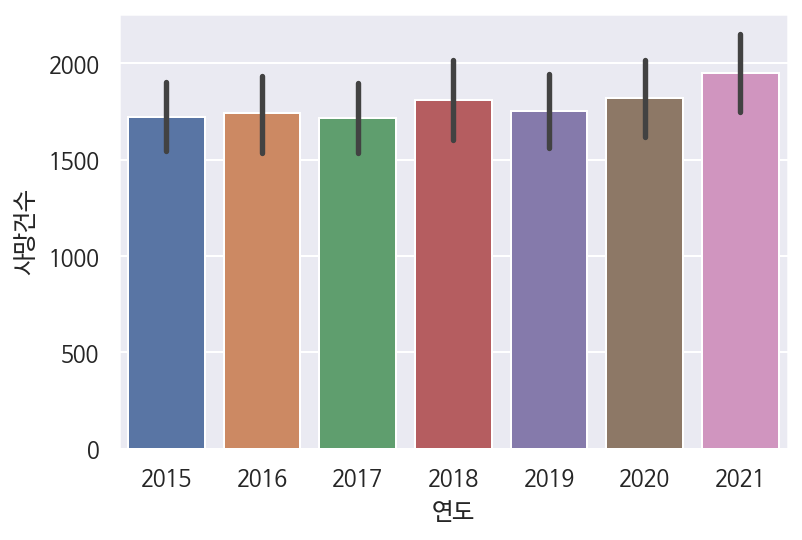

In [ ]:
sns.barplot(x=df_1_melt["연도"], y=df_1_melt["사망건수"])

In [ ]:
df_1_melt.sort_values("사망건수")["자치구별"].unique()

array(['중구', '종로구', '용산구', '금천구', '성동구', '광진구', '서초구', '서대문구', '마포구',
       '영등포구', '동작구', '구로구', '도봉구', '강남구', '동대문구', '강동구', '양천구', '강북구',
       '관악구', '중랑구', '성북구', '송파구', '은평구', '강서구', '노원구'], dtype=object)

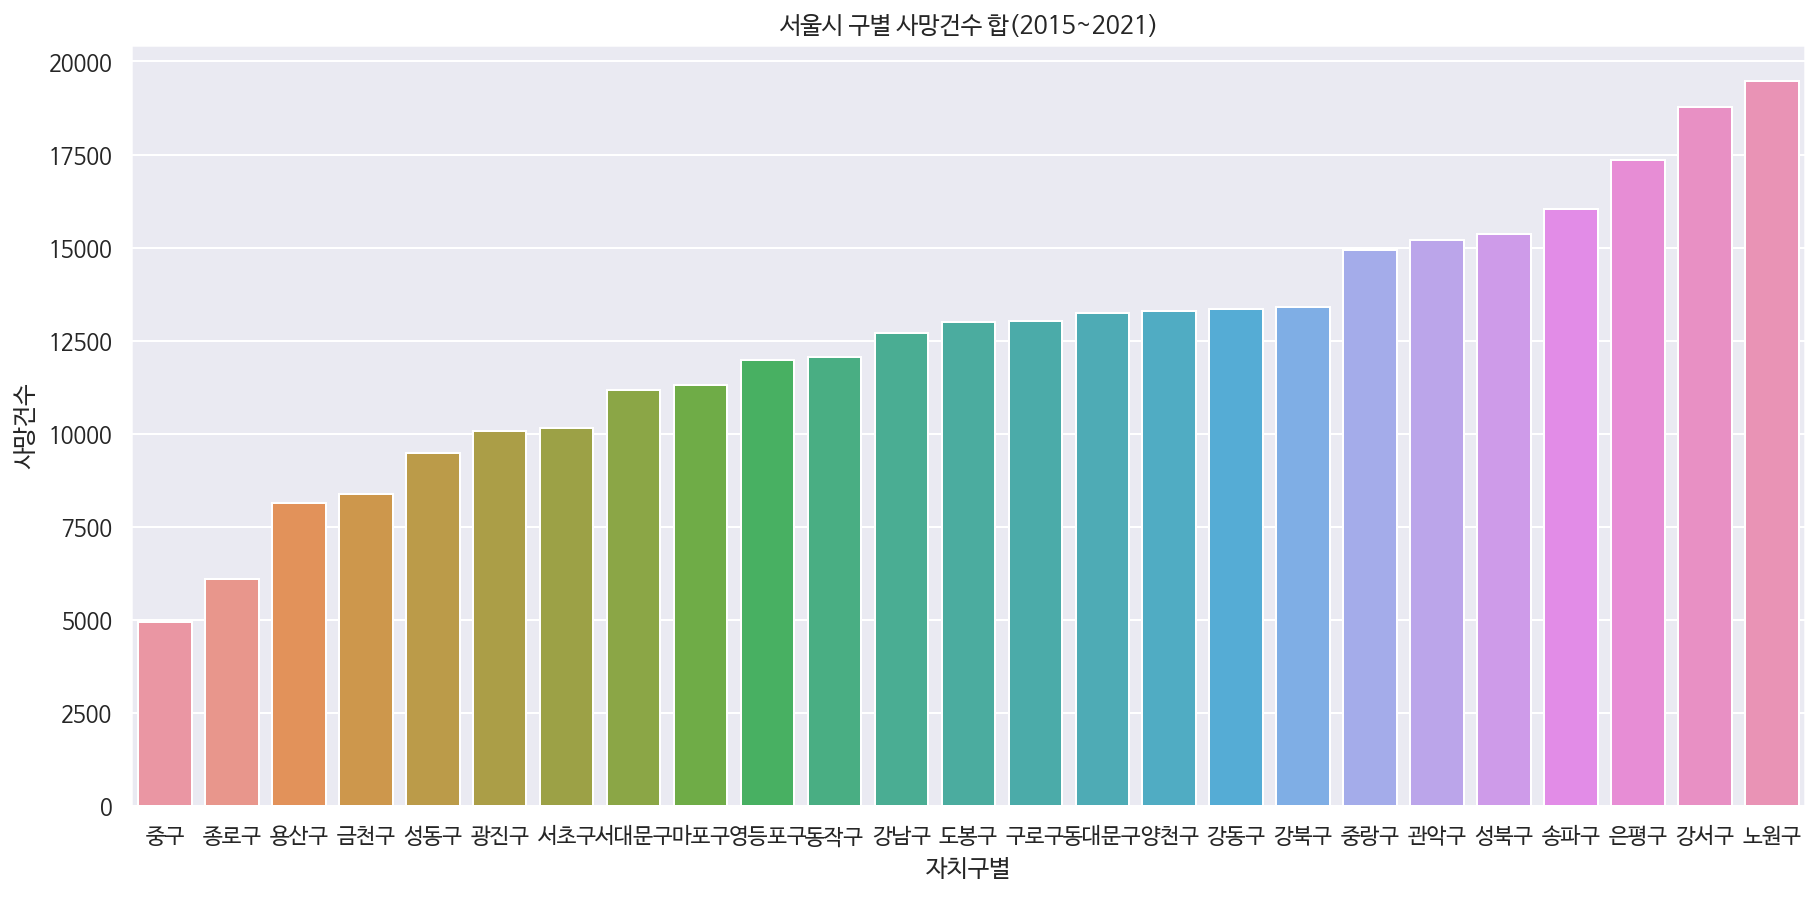

In [ ]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").sum().reset_index().sort_values("사망건수")
plt.title("서울시 구별 사망건수 합(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["사망건수"])

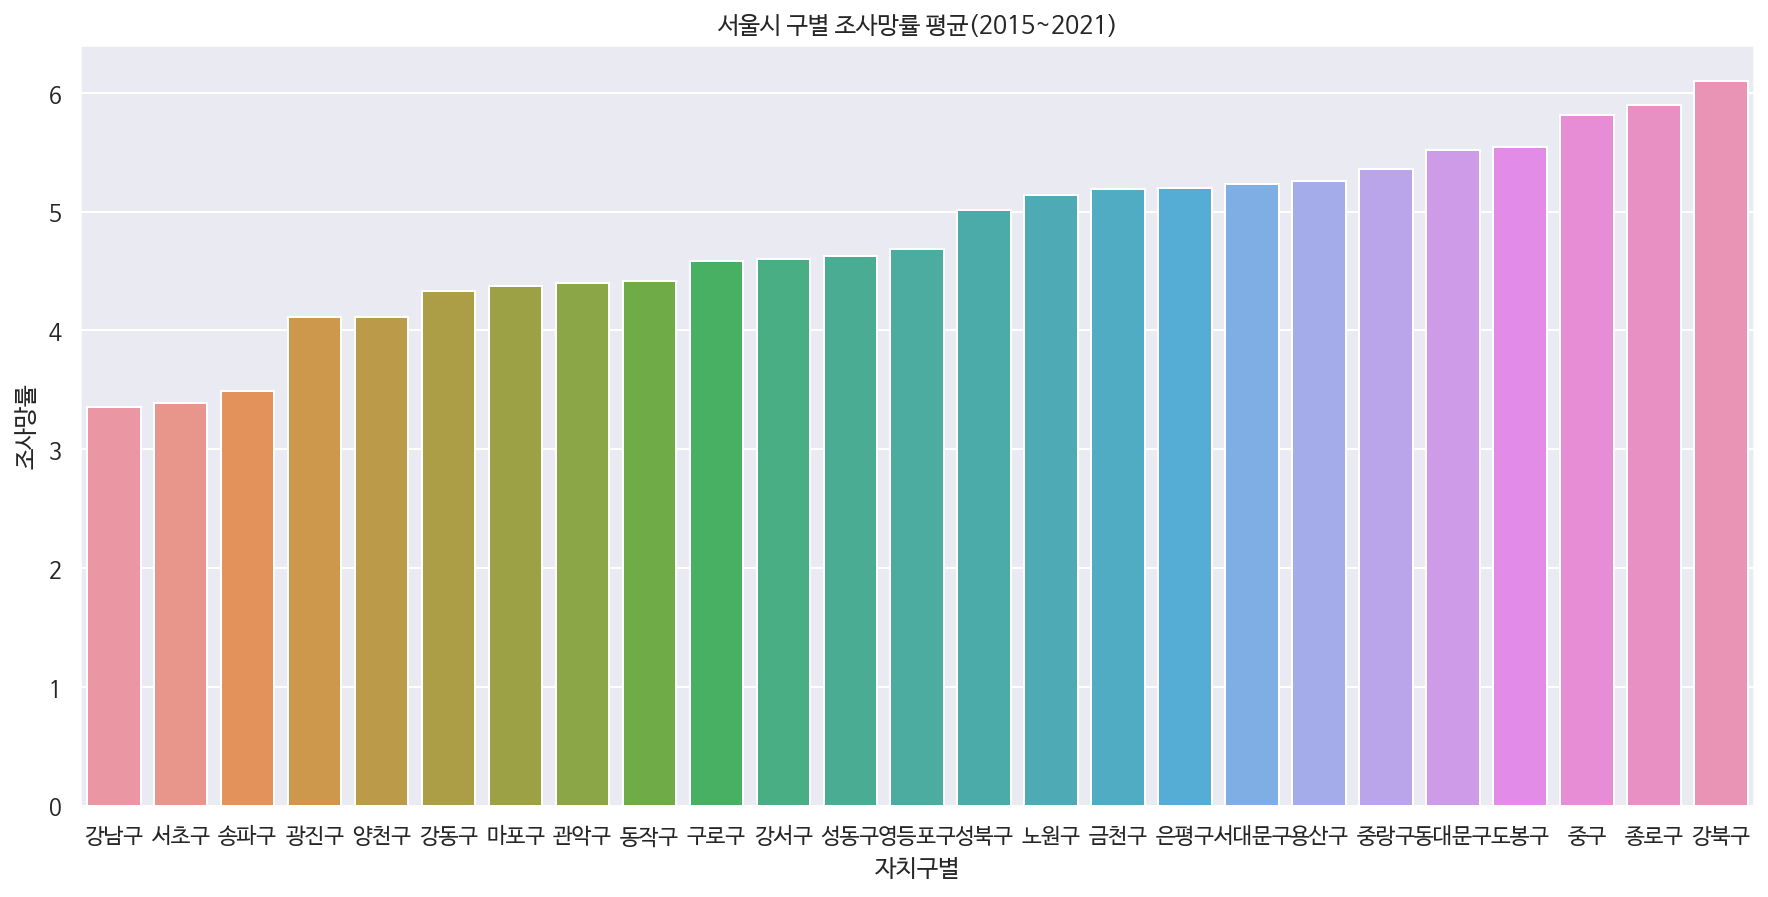

In [ ]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").mean().reset_index().sort_values("조사망률")
plt.title("서울시 구별 조사망률 평균(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["조사망률"])

### 과징금 데이터

In [ ]:
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")

In [ ]:
df_2.shape

(26, 8)

In [ ]:
df_2.head()

0     1     2     3     4     5     6     7
0    자치구별  2015  2016  2017  2018  2019  2020  2021
1  　　　종로구  5154  4326  5827  5396  5957  5811  4915
2   　　　중구  7971  7127  6425  6964  7469  8449  7005
3  　　　용산구  2905  2738  2534  2554  3410  3640  3314
4  　　　성동구  2450  1898  2536  2189  2950  2990  2805

In [ ]:
df_2.columns = df_2.iloc[0]
df_2 = df_2.iloc[1:]
df_2

0      자치구별  2015  2016  2017  2018  2019   2020   2021
1    　　　종로구  5154  4326  5827  5396  5957   5811   4915
2     　　　중구  7971  7127  6425  6964  7469   8449   7005
3    　　　용산구  2905  2738  2534  2554  3410   3640   3314
4    　　　성동구  2450  1898  2536  2189  2950   2990   2805
5    　　　광진구  1698  4539  5346  5494  4876   5319   6543
6   　　　동대문구  2864  2388  2683  2746  3411   3192   3467
7    　　　중랑구  2763  2694  3895  3965  4550   4856   4607
8    　　　성북구  2938  2218  2748  2409  2738   3169   2824
9    　　　강북구  1834  1919  2156  2152  2520   2436   2109
10   　　　도봉구  1141  1336  1526  1784  1527   1288   1466
11   　　　노원구  2046  2061  1798  1959  2236   1522   1801
12   　　　은평구  2462  1593  1738  2510  3023   3620   3608
13  　　　서대문구  3283  3488  3350  3107  3287   3097   2980
14   　　　마포구  3951  3501  4790  4139  4477   4145   4323
15   　　　양천구  1905  1827  2086  2707  3210   2599   2213
16   　　　강서구  2951  3051  3649  4052  4613   3608   4422
17   　　　구로구  2926  1986  2783  2475  3167   3037   3083
18   　　　금천구  1923  2606  2302  2137  2359   2339   2059
19  　　　영등포구  4856  4927  4739  4754  5237   4858   5126
20   　　　동작구  4146  2484  4589  5135  5606   4495   5270
21   　　　관악구  3006  3107  3712  3461  4278   5961   6379
22   　　　서초구   308  3975  7010  5553  8497   7414   6316
23   　　　강남구  6095  6611  9744  8160  8228   6929   6901
24   　　　송파구  5413  7201  7137  9069  8660  10150  10918
25   　　　강동구  4215  3602  5013  5690  6506   4871   3760

In [ ]:
df_3.describe()

1            2            3            4            5  \
count    26.000000    26.000000    26.000000    26.000000    26.000000   
mean    108.323077   108.592308   108.096154   106.503846   105.519231   
std     389.097819   389.242108   389.538923   390.045834   390.463880   
min      15.900000    17.700000    17.800000    15.600000    15.400000   
25%      22.600000    22.575000    21.650000    20.075000    19.625000   
50%      27.400000    28.000000    27.650000    26.800000    24.900000   
75%      41.600000    42.350000    42.300000    38.725000    37.725000   
max    2015.000000  2016.000000  2017.000000  2018.000000  2019.000000   

                 6            7  
count    26.000000    26.000000  
mean    105.734615   106.711538  
std     390.612819   390.637046  
min      15.800000    15.900000  
25%      20.275000    20.925000  
50%      25.700000    26.200000  
75%      37.200000    38.975000  
max    2020.000000  2021.000000

In [ ]:
df_2.columns

Index(['자치구별', 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='object', name=0)

In [ ]:
#과징금 melt
df_2_melt = df_2.melt(
    id_vars='자치구별', 
    var_name="연도",
    value_name="과징금"
    )
df_2_melt.head()
# 근데 과징금 단위가 얼마지?

자치구별    연도   과징금
0  　　　종로구  2015  5154
1   　　　중구  2015  7971
2  　　　용산구  2015  2905
3  　　　성동구  2015  2450
4  　　　광진구  2015  1698

### 재정자립도 데이터

재정 자립도 참고사항

1. 재정자립도 = 자체수입(지방세+세외수입) / 일반회계 예산액 *100
2. 평균은 예산순계, 자치단체별을 예산총계 기준임
3. 2010-2011 : ( )는 세입과목 개편전 기준으로 산정한 재정자립도임
4. 2014-2020 : 세입과목 개편후 기준으로 산정한 재정자립도임(2014-2016은 ( )에 해당하는 수치)

출처: https://data.seoul.go.kr/dataList/188/S/2/datasetView.do

In [ ]:
df_3.head()

0       1       2       3       4       5       6       7
0  자치구별  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0
1   종로구    50.0    50.4    50.8    47.4    47.4    47.0    47.2
2    중구    58.6    57.1    58.4    53.4    54.9    53.5    55.3
3   용산구    40.1    41.0    42.4    41.1    39.2    39.3    41.7
4   성동구    34.5    37.3    34.5    34.1    32.5    32.7    33.2

In [ ]:
df_3.shape

(26, 8)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       26 non-null     object 
 1   1       26 non-null     float64
 2   2       26 non-null     float64
 3   3       26 non-null     float64
 4   4       26 non-null     float64
 5   5       26 non-null     float64
 6   6       26 non-null     float64
 7   7       26 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.8+ KB


In [ ]:
df_3.columns = df_3.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_3 = df_3.iloc[1:]
df_3

0   자치구별  2015  2016  2017  2018  2019  2020  2021
1    종로구  50.0  50.4  50.8  47.4  47.4  47.0  47.2
2     중구  58.6  57.1  58.4  53.4  54.9  53.5  55.3
3    용산구  40.1  41.0  42.4  41.1  39.2  39.3  41.7
4    성동구  34.5  37.3  34.5  34.1  32.5  32.7  33.2
5    광진구  27.4  27.2  28.1  27.1  26.7  26.2  26.1
6   동대문구  27.0  27.8  27.2  25.6  23.8  23.2  24.5
7    중랑구  23.2  21.0  20.6  19.0  18.1  17.5  18.2
8    성북구  22.4  22.8  21.8  19.6  19.6  20.0  20.6
9    강북구  18.6  19.1  18.8  17.6  16.8  16.8  17.2
10   도봉구  19.5  20.4  19.8  18.5  17.8  18.4  18.9
11   노원구  15.9  17.7  17.8  15.6  15.4  15.8  15.9
12   은평구  19.8  20.8  19.1  18.0  17.5  17.9  18.4
13  서대문구  25.7  26.2  26.6  25.4  24.1  23.4  23.5
14   마포구  33.3  33.1  32.9  31.5  30.7  31.6  32.0
15   양천구  27.3  28.2  28.5  26.8  24.5  25.2  25.2
16   강서구  22.4  22.5  21.6  21.5  19.7  21.1  21.9
17   구로구  25.1  24.8  24.0  22.5  21.8  22.2  22.5
18   금천구  27.4  26.8  27.2  25.6  25.3  24.7  26.3
19  영등포구  44.2  42.8  42.0  37.9  35.7  36.0  36.5
20   동작구  28.7  28.7  27.2  26.8  26.0  26.4  29.1
21   관악구  21.6  20.7  20.6  19.4  18.7  19.3  19.7
22   서초구  57.4  57.9  52.5  53.4  53.3  54.7  58.2
23   강남구  60.0  60.0  58.2  53.3  54.4  52.3  54.9
24   송파구  42.1  42.9  42.8  39.0  38.4  37.6  39.8
25   강동구  29.2  30.2  30.1  31.0  22.2  26.3  26.7

In [ ]:
df_3_melt = df_3.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자립도")
df_3_melt.head()

자치구별    연도  재정자립도
0  종로구  2015   50.0
1   중구  2015   58.6
2  용산구  2015   40.1
3  성동구  2015   34.5
4  광진구  2015   27.4

### 재정 자주도 데이터

In [ ]:
df_4.head()

0       1       2       3       4       5       6       7       8  \
0  자치구별  2014.0  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0   
1   종로구    69.9    64.9    66.9    67.8    65.4    63.6    62.2    61.8   
2    중구    67.9    62.9    62.5    63.9    61.2    61.1    59.5    59.9   
3   용산구    58.1    54.9    57.6    60.0    59.3    55.5    54.6    57.9   
4   성동구    52.2    55.2    58.4    57.4    57.5    54.8    53.5    53.0   

        9  
0  2022.0  
1    64.9  
2    61.0  
3    58.7  
4    55.7

In [ ]:
df_4.shape

(26, 10)

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       26 non-null     object 
 1   1       26 non-null     float64
 2   2       26 non-null     float64
 3   3       26 non-null     float64
 4   4       26 non-null     float64
 5   5       26 non-null     float64
 6   6       26 non-null     float64
 7   7       26 non-null     float64
 8   8       26 non-null     float64
 9   9       26 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.2+ KB


In [ ]:
df_4.columns = df_4.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_4 = df_4.iloc[1:]
df_4.head()

0 자치구별  2014  2015  2016  2017  2018  2019  2020  2021  2022
1  종로구  69.9  64.9  66.9  67.8  65.4  63.6  62.2  61.8  64.9
2   중구  67.9  62.9  62.5  63.9  61.2  61.1  59.5  59.9  61.0
3  용산구  58.1  54.9  57.6  60.0  59.3  55.5  54.6  57.9  58.7
4  성동구  52.2  55.2  58.4  57.4  57.5  54.8  53.5  53.0  55.7
5  광진구  59.3  55.8  55.3  56.5  53.9  52.0  50.8  49.6  48.7

In [ ]:
df_4.describe()

0           2014       2015       2016       2017       2018       2019  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean   54.844000  52.524000  53.224000  53.304000  51.344000  48.772000   
std     6.595269   5.764784   5.795924   5.723015   6.060396   6.611135   
min    43.900000  42.100000  43.200000  42.500000  42.300000  38.200000   
25%    51.600000  50.200000  50.700000  50.700000  46.800000  43.600000   
50%    52.900000  51.100000  51.700000  52.400000  51.300000  48.200000   
75%    56.200000  55.200000  57.600000  56.500000  54.700000  52.000000   
max    69.900000  64.900000  66.900000  67.800000  65.400000  63.600000   

0           2020       2021       2022  
count  25.000000  25.000000  25.000000  
mean   49.044000  49.320000  50.208000  
std     5.651628   6.120798   6.607377  
min    39.500000  40.500000  40.300000  
25%    45.500000  45.800000  46.400000  
50%    48.800000  47.600000  48.700000  
75%    50.900000  51.400000  52.100000  
max    62.200000  61.800000  64.900000

In [ ]:
df_4_melt = df_4.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자주도")
df_4_melt.head()

자치구별    연도  재정자주도
0  종로구  2015   64.9
1   중구  2015   62.9
2  용산구  2015   54.9
3  성동구  2015   55.2
4  광진구  2015   55.8

### `df_data` 생성

In [ ]:
df_data = pd.concat([
    df_1_melt.sort_values(["연도", "자치구별"]),
    df_2_melt.sort_values(["연도", "자치구별"])["과징금"],
    df_3_melt.sort_values(["연도", "자치구별"])["재정자립도"],
    df_4_melt.sort_values(["연도", "자치구별"])["재정자주도"]
], axis=1)
df_data.head()

연도 자치구별  사망건수  조사망률   과징금  재정자립도  재정자주도
0  2015  종로구   829   5.5  5154   50.0   64.9
1  2016  종로구   823   5.5  7971   58.6   62.9
2  2017  종로구   826   5.6  2905   40.1   54.9
3  2018  종로구   897   6.0  2450   34.5   55.2
4  2019  종로구   854   5.8  1698   27.4   55.8

- `df_data`가 최종 전처리된 데이터프레임입니다. 

## EDA (df_data로)

In [ ]:
#MinMaxScaler로 정규화하는 함수 정의
def mm(df):
  from sklearn.preprocessing import MinMaxScaler
  mm = MinMaxScaler()
  output = mm.fit_transform(df)
  return pd.DataFrame(output, columns=df.columns, index=list(df.index.values))

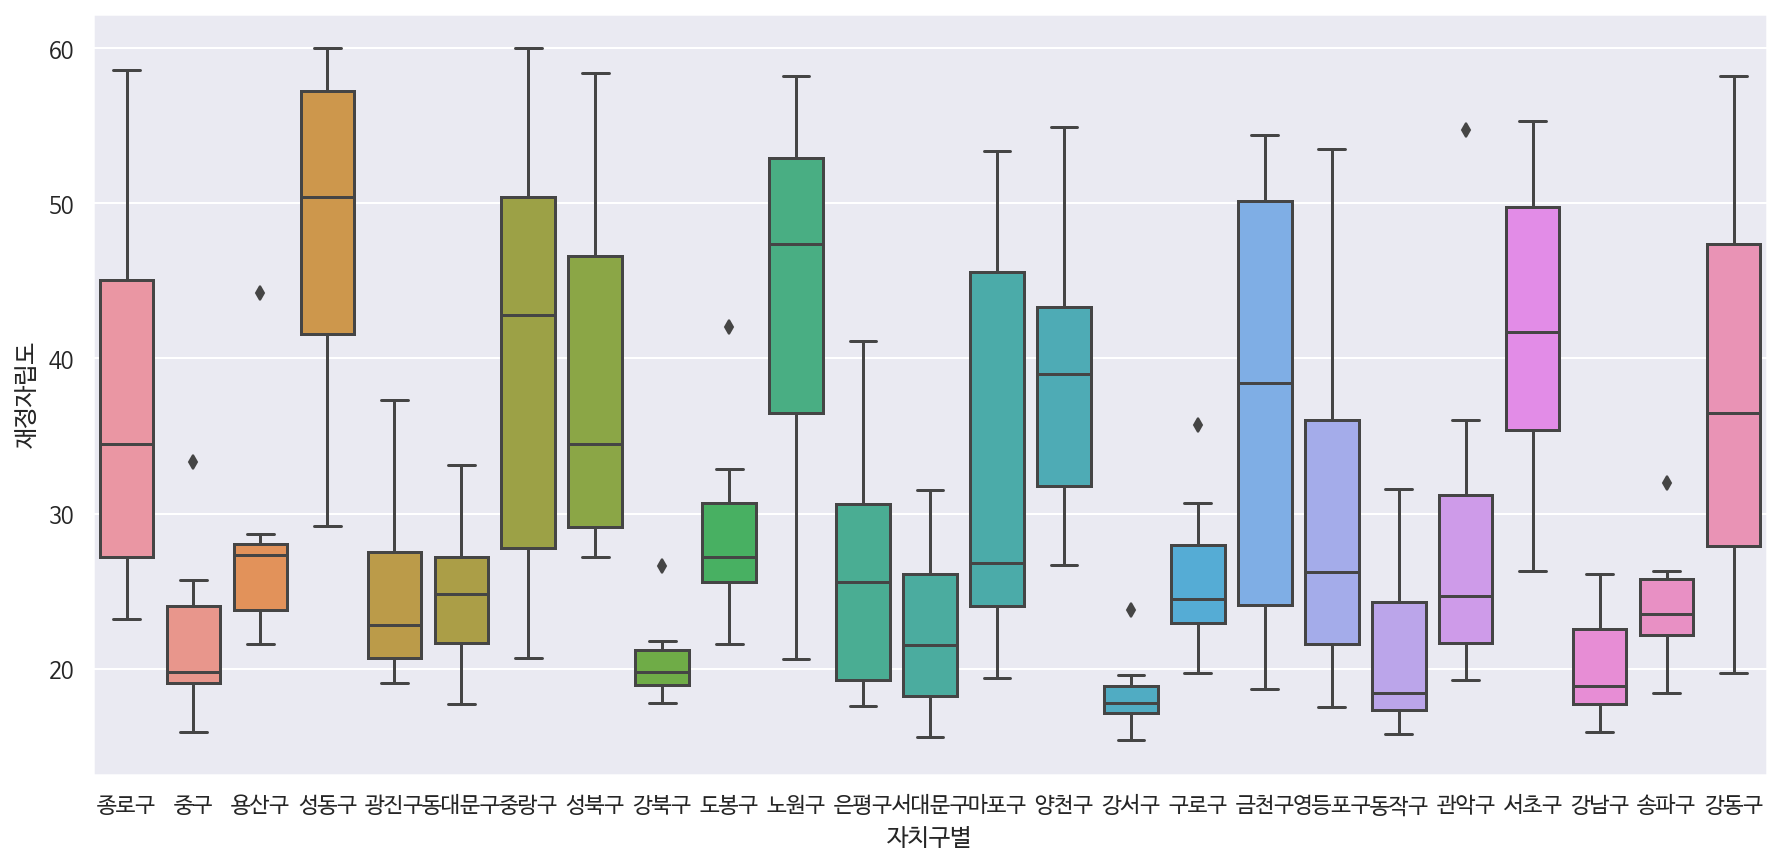

In [ ]:
#(2015~2021)자치구별 재정자립도 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="자치구별", y="재정자립도", data=df_data)

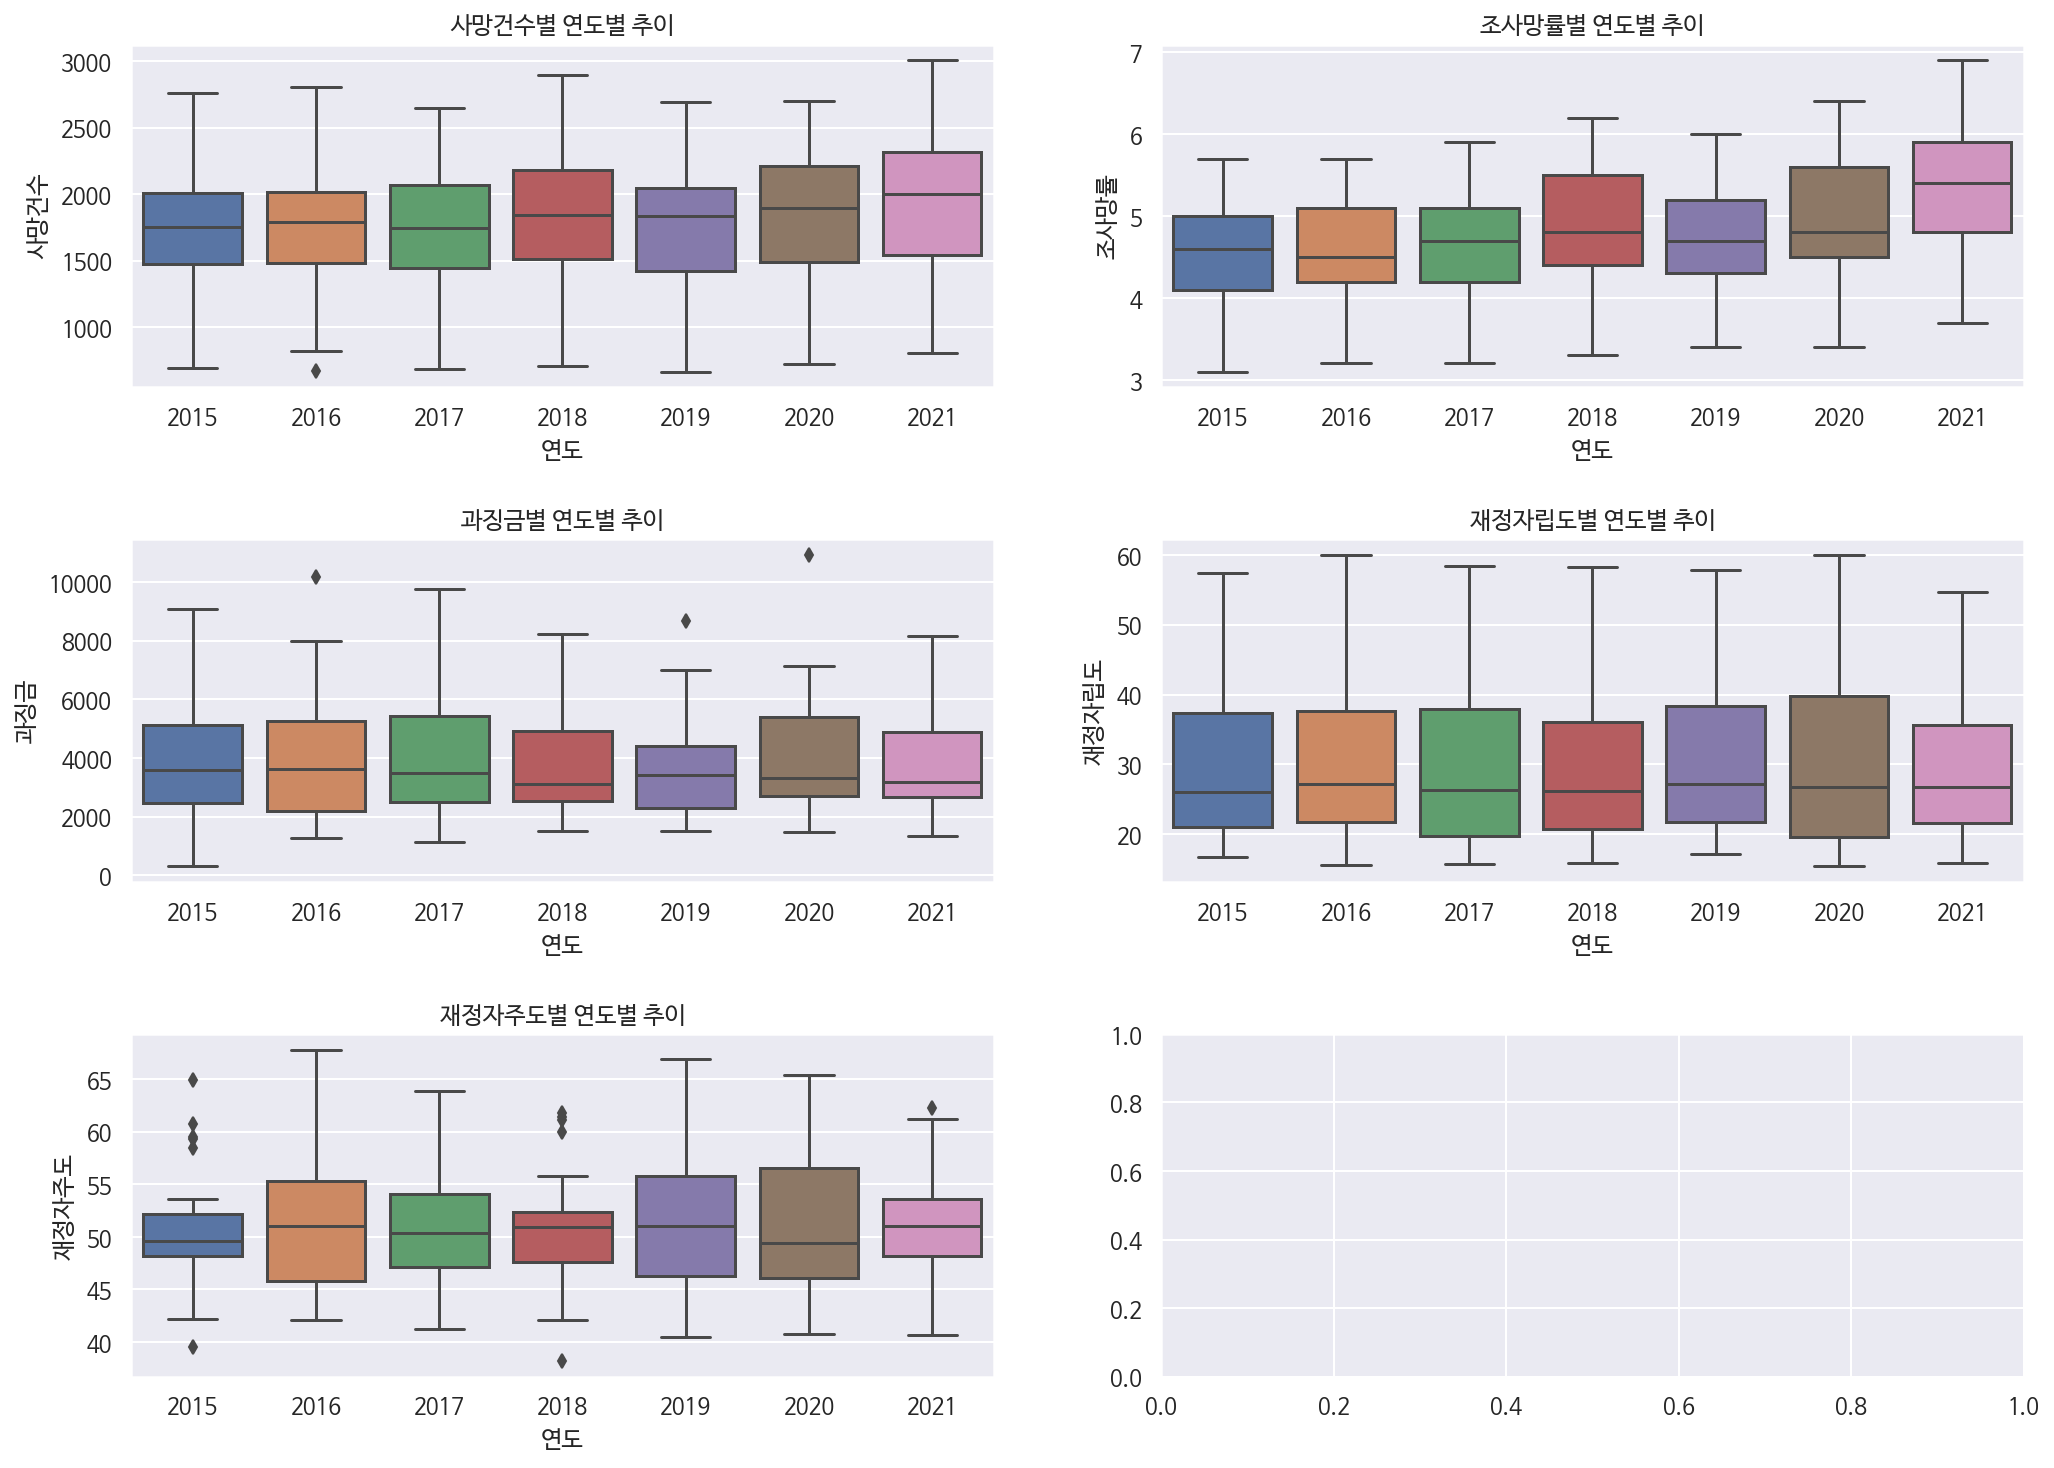

In [ ]:
# 연도별 각 variable boxplot 보기
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 11))
plt.tight_layout(pad=5.0)

for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.pivot('자치구별', '연도', title)
  sns.boxplot(x="연도",y=title, data=df_data, ax=ax[i//2, i%2])
  # sns.lineplot(x="연도",y=title, data=df_data, ax=ax[i//2, i%2], color='red', markers=True)
  ax[i//2, i%2].set_title(f'{title}별 연도별 추이')

In [ ]:
#log scale로 변환
df_data_log = df_data[:]
df_data_log[df_data_log.columns[2:]] = np.log(df_data[df_data.columns[2:]])
df_data_log

연도 자치구별      사망건수      조사망률       과징금     재정자립도     재정자주도
0    2015  종로구  6.720220  1.704748  8.547528  3.912023  4.172848
1    2016  종로구  6.712956  1.704748  8.983565  4.070735  4.141546
2    2017  종로구  6.716595  1.722767  7.974189  3.691376  4.005513
3    2018  종로구  6.799056  1.791759  7.803843  3.540959  4.010963
4    2019  종로구  6.749931  1.757858  7.437206  3.310543  4.021774
..    ...  ...       ...       ...       ...       ...       ...
170  2017  강동구  7.537430  1.458615  8.760767  2.980619  3.819908
171  2018  강동구  7.552237  1.504077  8.750841  4.063885  4.117410
172  2019  강동구  7.548556  1.504077  8.839422  4.005513  4.025352
173  2020  강동구  7.550135  1.458615  9.298168  3.683867  3.830813
174  2021  강동구  7.660114  1.547563  8.232174  3.284664  3.860730

[175 rows x 7 columns]

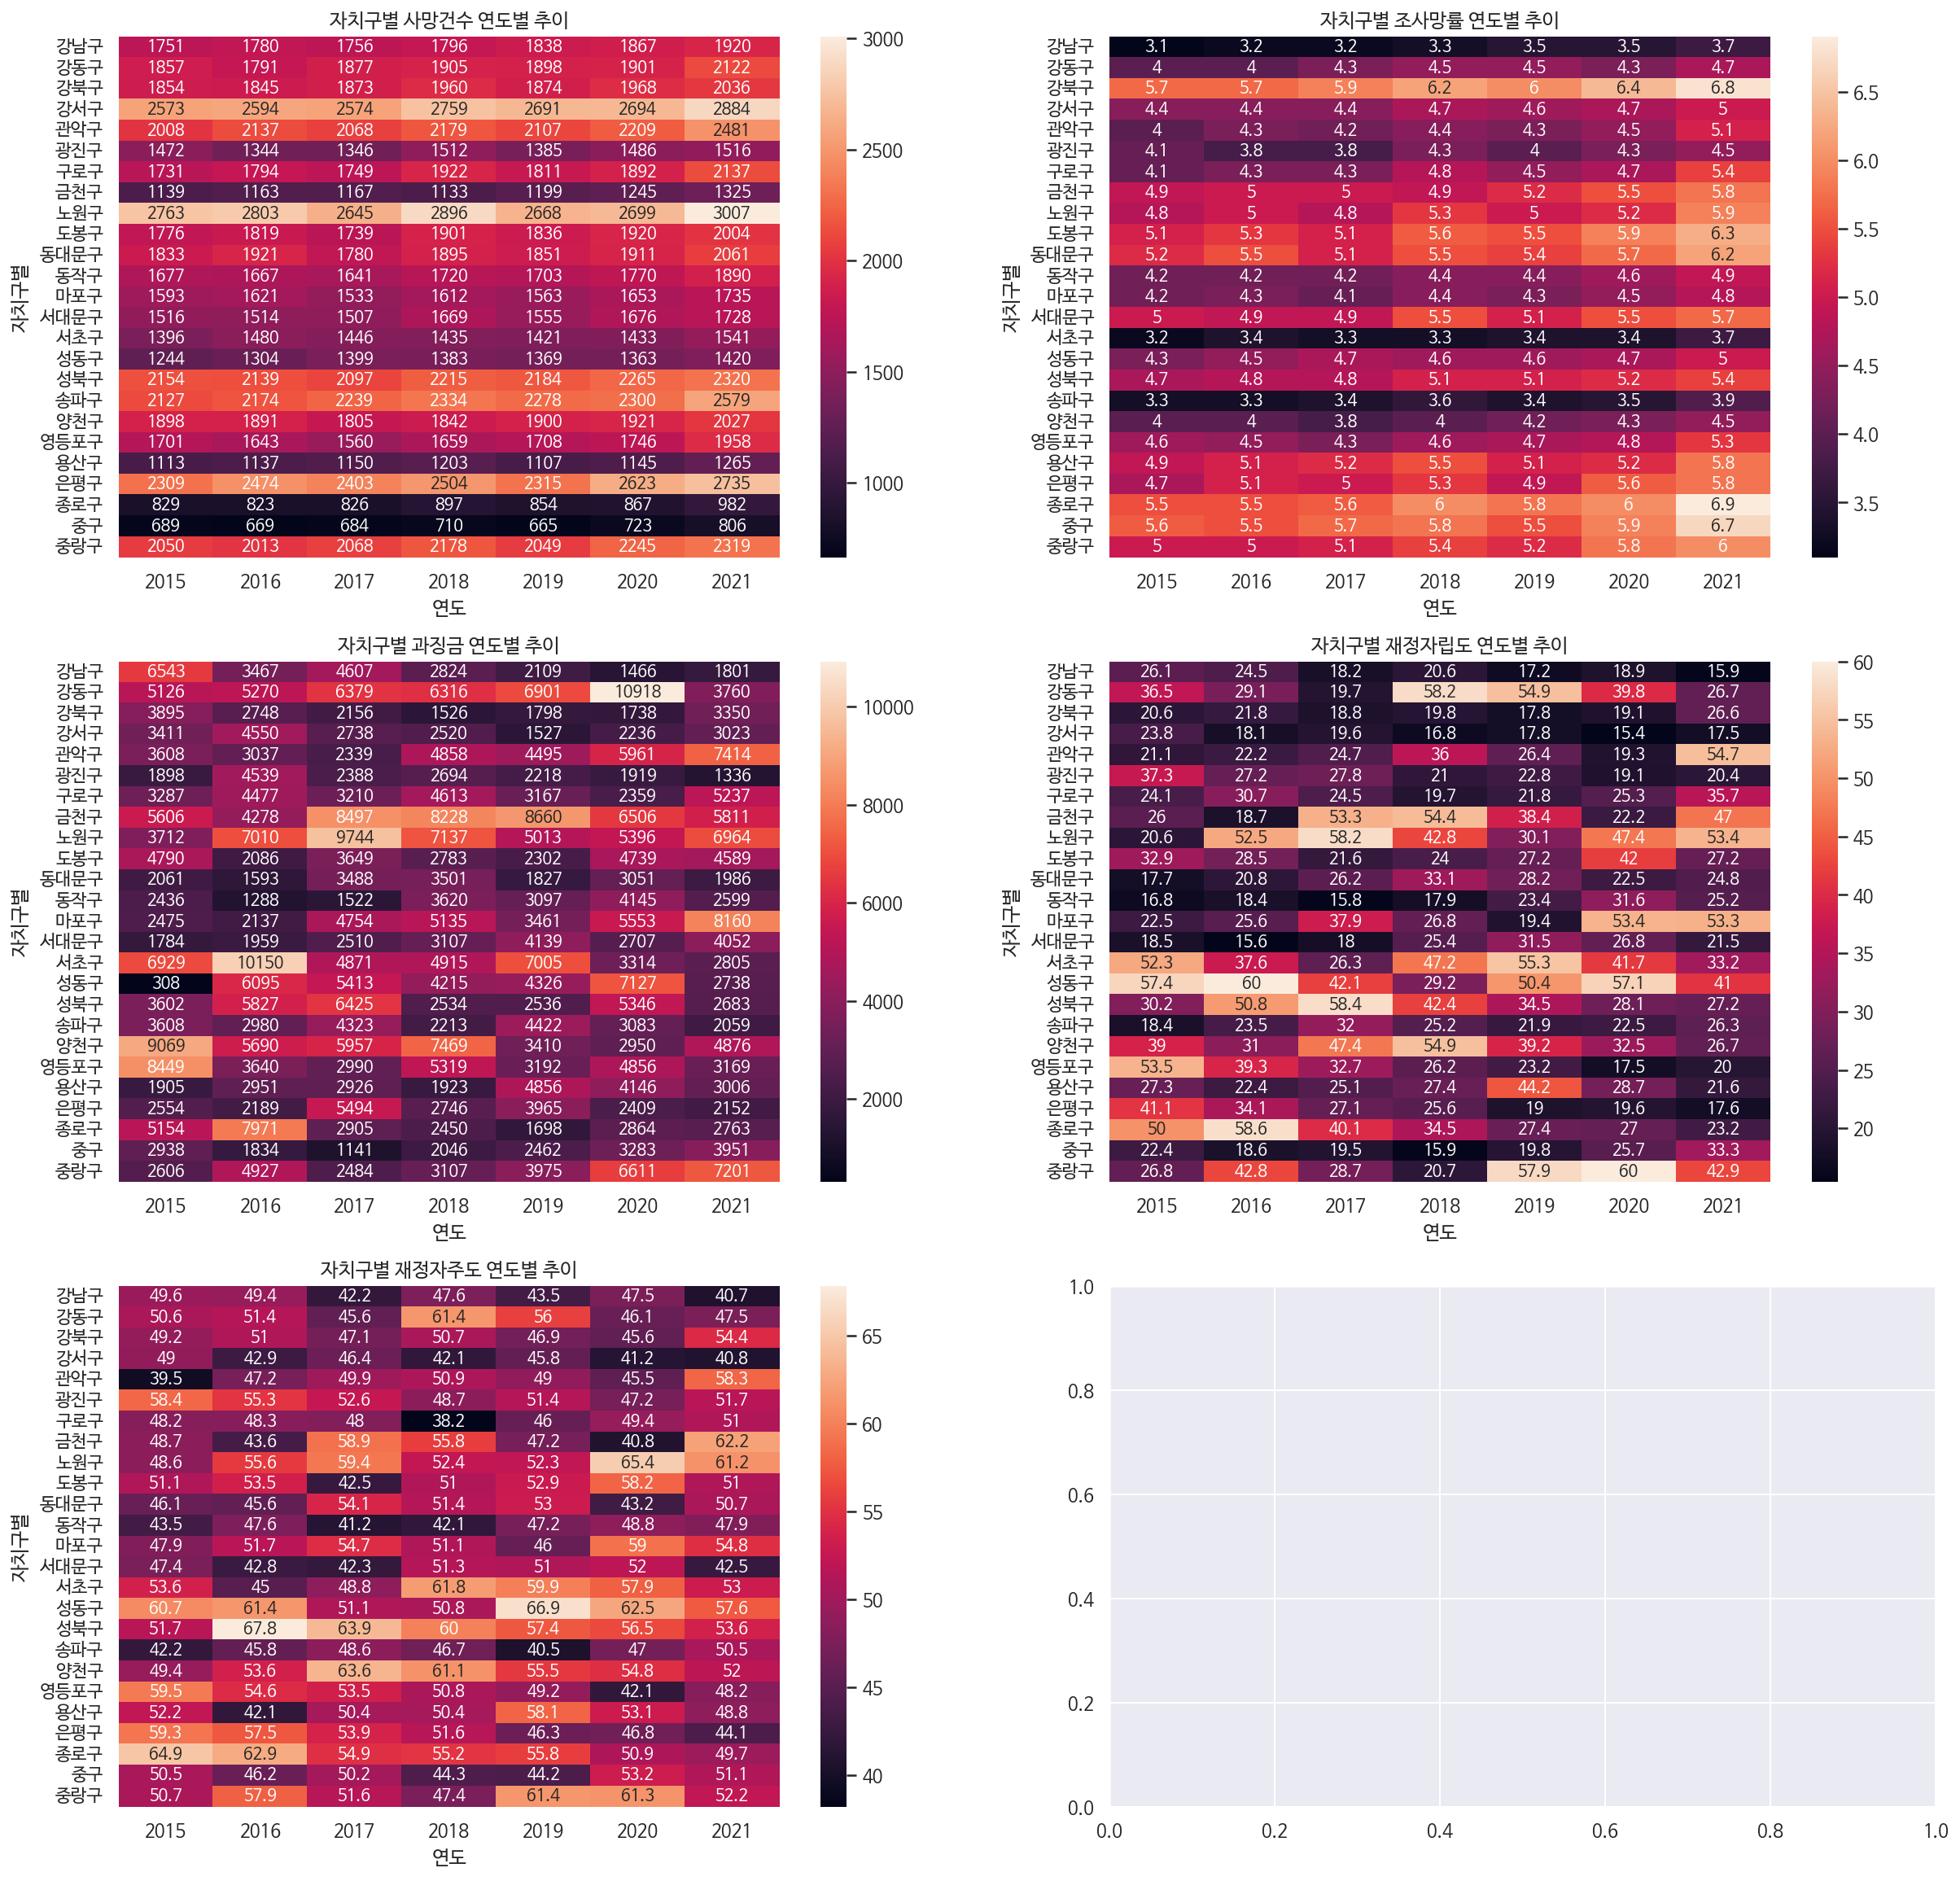

In [ ]:
# 연도별 각 항목별 추이 보기
# plt.figure(figsize=(7, 8))
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.pivot('자치구별', '연도', title)
  sns.heatmap(df_temp, annot=True, fmt='g', ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f'자치구별 {title} 연도별 추이')

In [ ]:
#자치구별 각 지표 평균 알아보기
df_data.groupby("자치구별").mean()

사망건수      조사망률          과징금      재정자립도      재정자주도
자치구별                                                          
강남구   1815.428571  3.357143  3259.571429  20.200000  45.785714
강동구   1907.285714  4.328571  6381.428571  37.842857  51.228571
강북구   1915.714286  6.100000  2458.714286  20.642857  49.271429
강서구   2681.285714  4.600000  2857.857143  18.428571  44.028571
관악구   2169.857143  4.400000  4530.285714  29.200000  48.614286
광진구   1437.285714  4.114286  2427.428571  25.085714  52.185714
구로구   1862.285714  4.585714  3764.285714  25.971429  47.014286
금천구   1195.857143  5.185714  6798.000000  37.142857  51.028571
노원구   2783.000000  5.142857  6425.142857  43.571429  56.414286
도봉구   1856.428571  5.542857  3562.571429  29.057143  51.457143
동대문구  1893.142857  5.514286  2501.000000  24.757143  49.157143
동작구   1724.000000  4.414286  2672.428571  21.300000  45.471429
마포구   1615.714286  4.371429  4525.000000  34.128571  52.171429
서대문구  1595.000000  5.228571  2894.000000  22.471429  47.042857
서초구   1450.285714  3.385714  5712.714286  41.942857  54.285714
성동구   1354.571429  4.628571  4317.428571  48.171429  58.714286
성북구   2196.285714  5.014286  4136.142857  38.800000  58.700000
송파구   2290.142857  3.485714  3241.142857  24.257143  45.900000
양천구   1897.714286  4.114286  5631.571429  38.671429  55.714286
영등포구  1710.714286  4.685714  4516.428571  30.342857  51.128571
용산구   1160.000000  5.257143  3101.857143  28.100000  50.728571
은평구   2480.428571  5.200000  3072.714286  26.300000  51.357143
종로구    868.285714  5.900000  3686.428571  37.257143  56.328571
중구     706.571429  5.814286  2522.142857  22.171429  48.528571
중랑구   2131.714286  5.357143  4415.857143  39.971429  54.642857

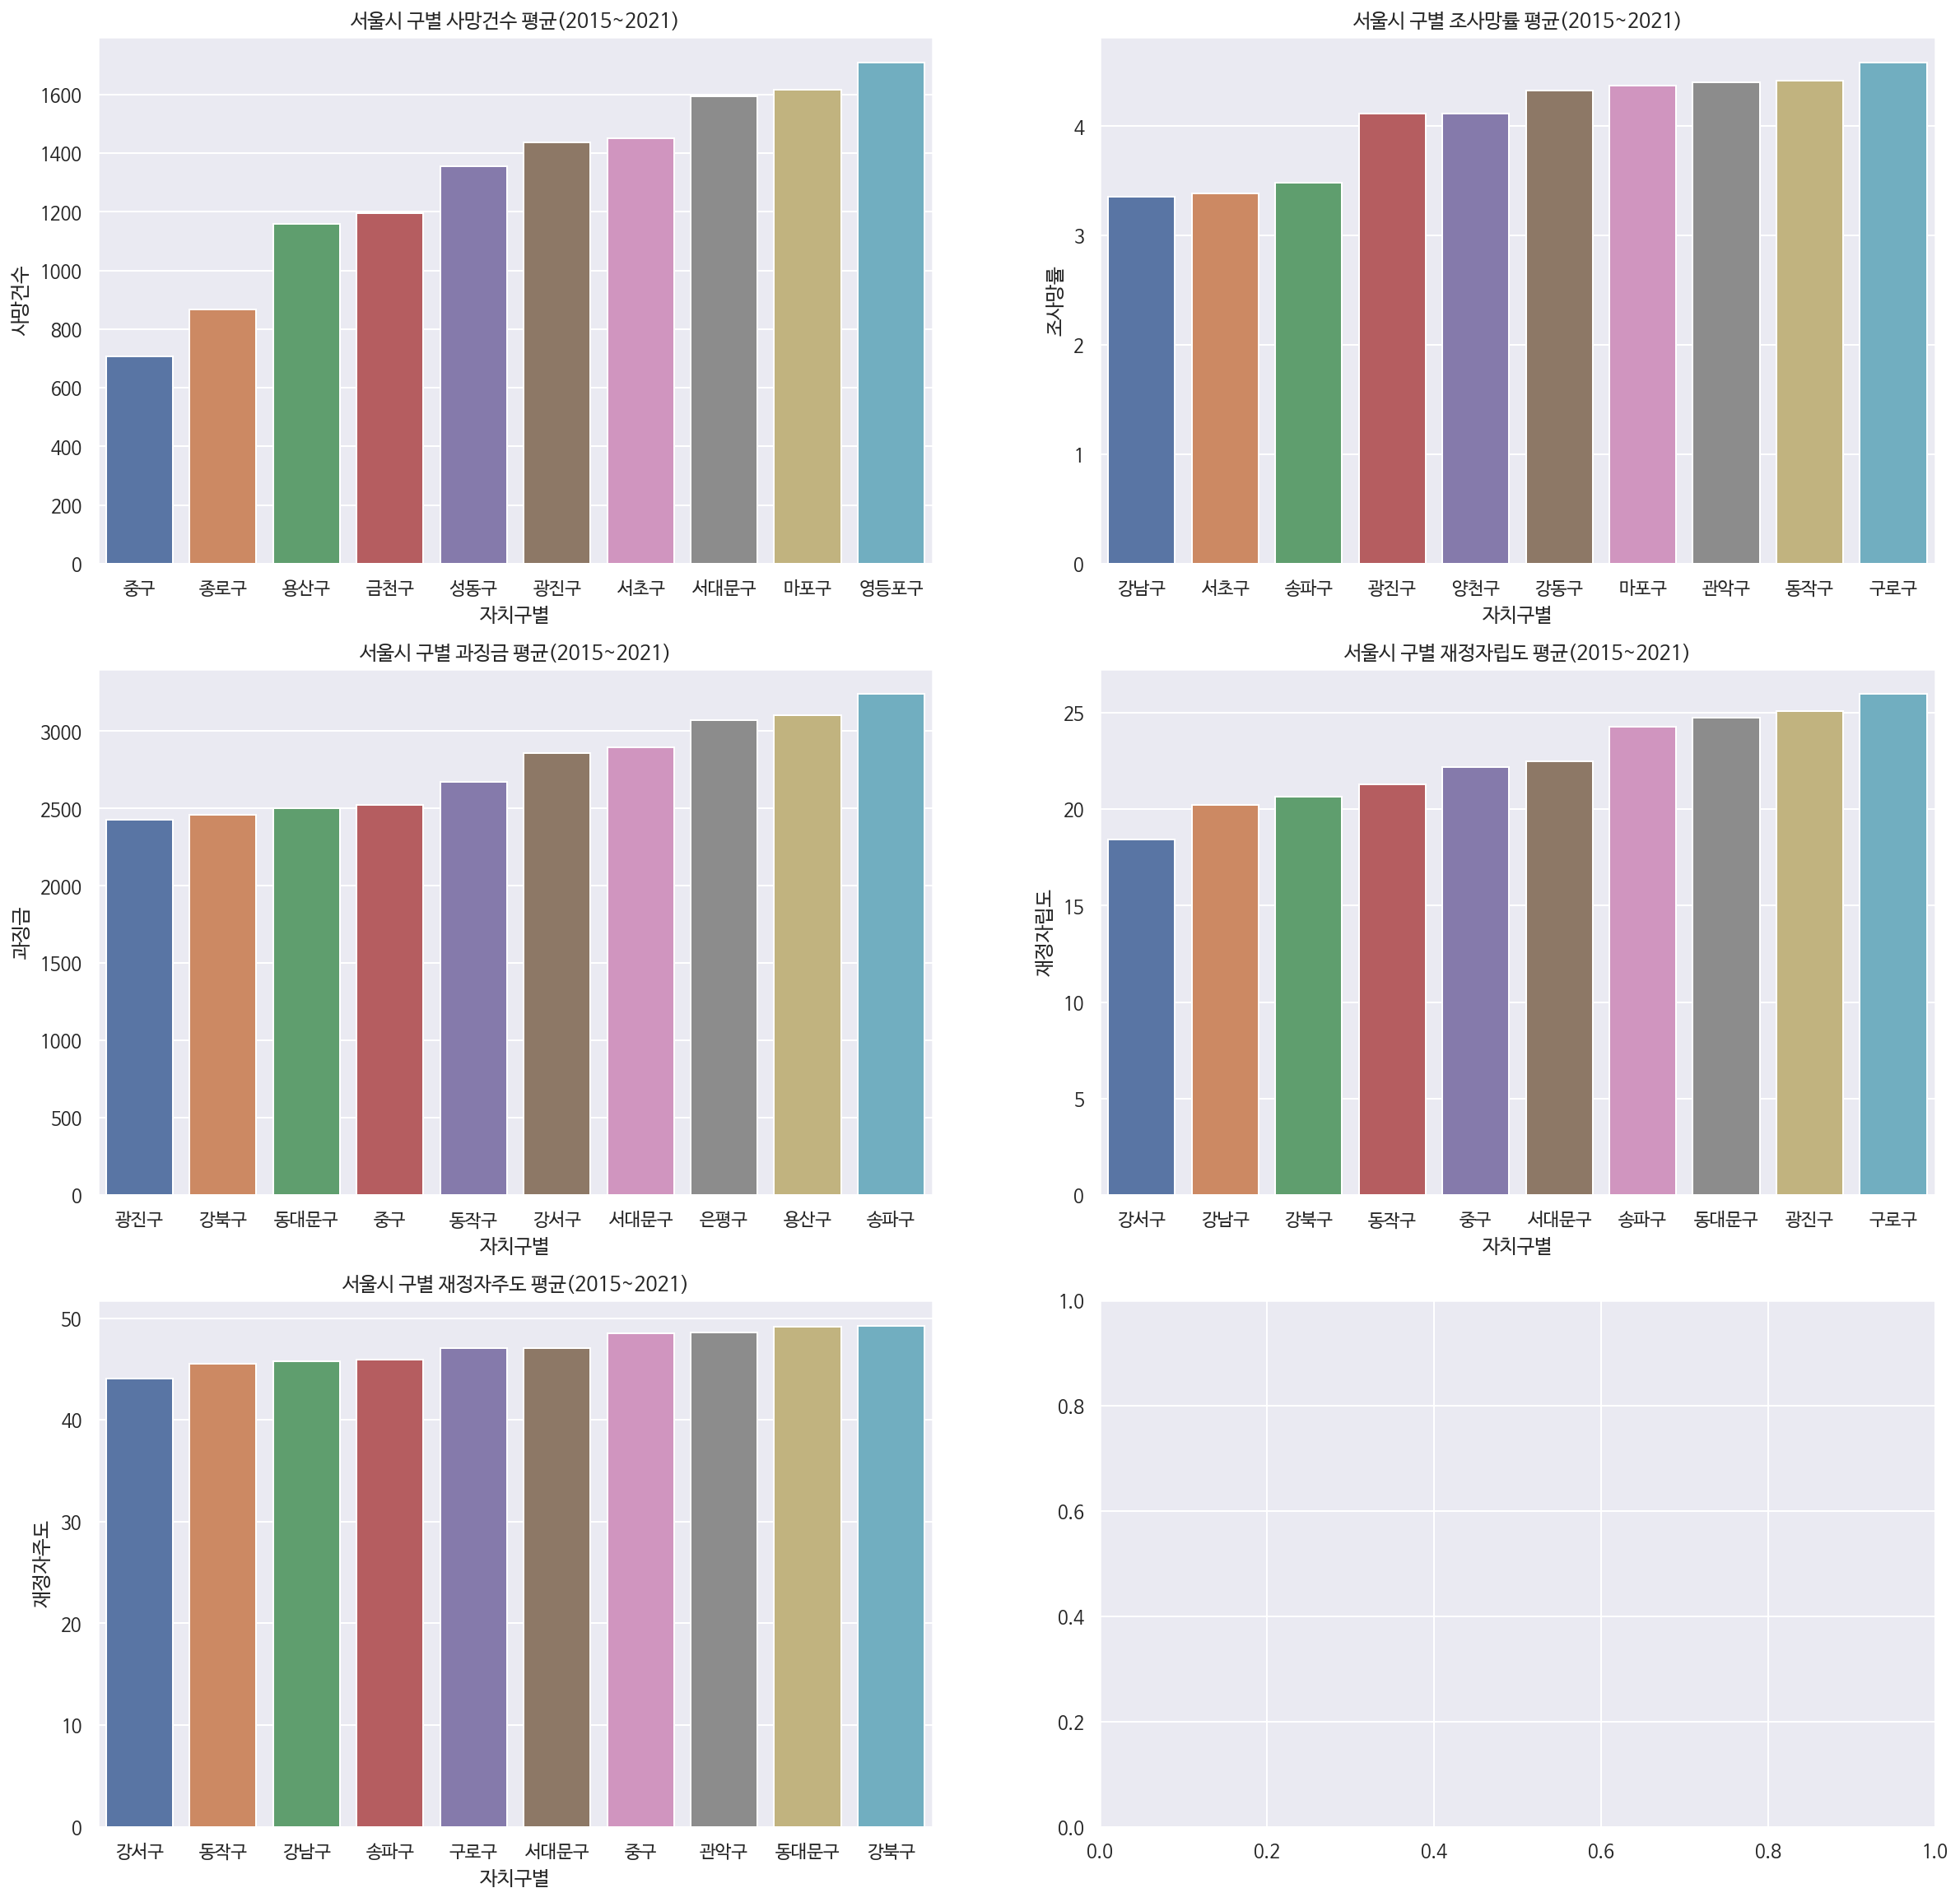

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(10)
  sns.barplot(x=df_temp["자치구별"], y=df_temp[title], ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"서울시 구별 {title} 평균(2015~2021)")

Text(0.5, 1.0, '연도별 지표 평균 추이(MinMaxScaled)')

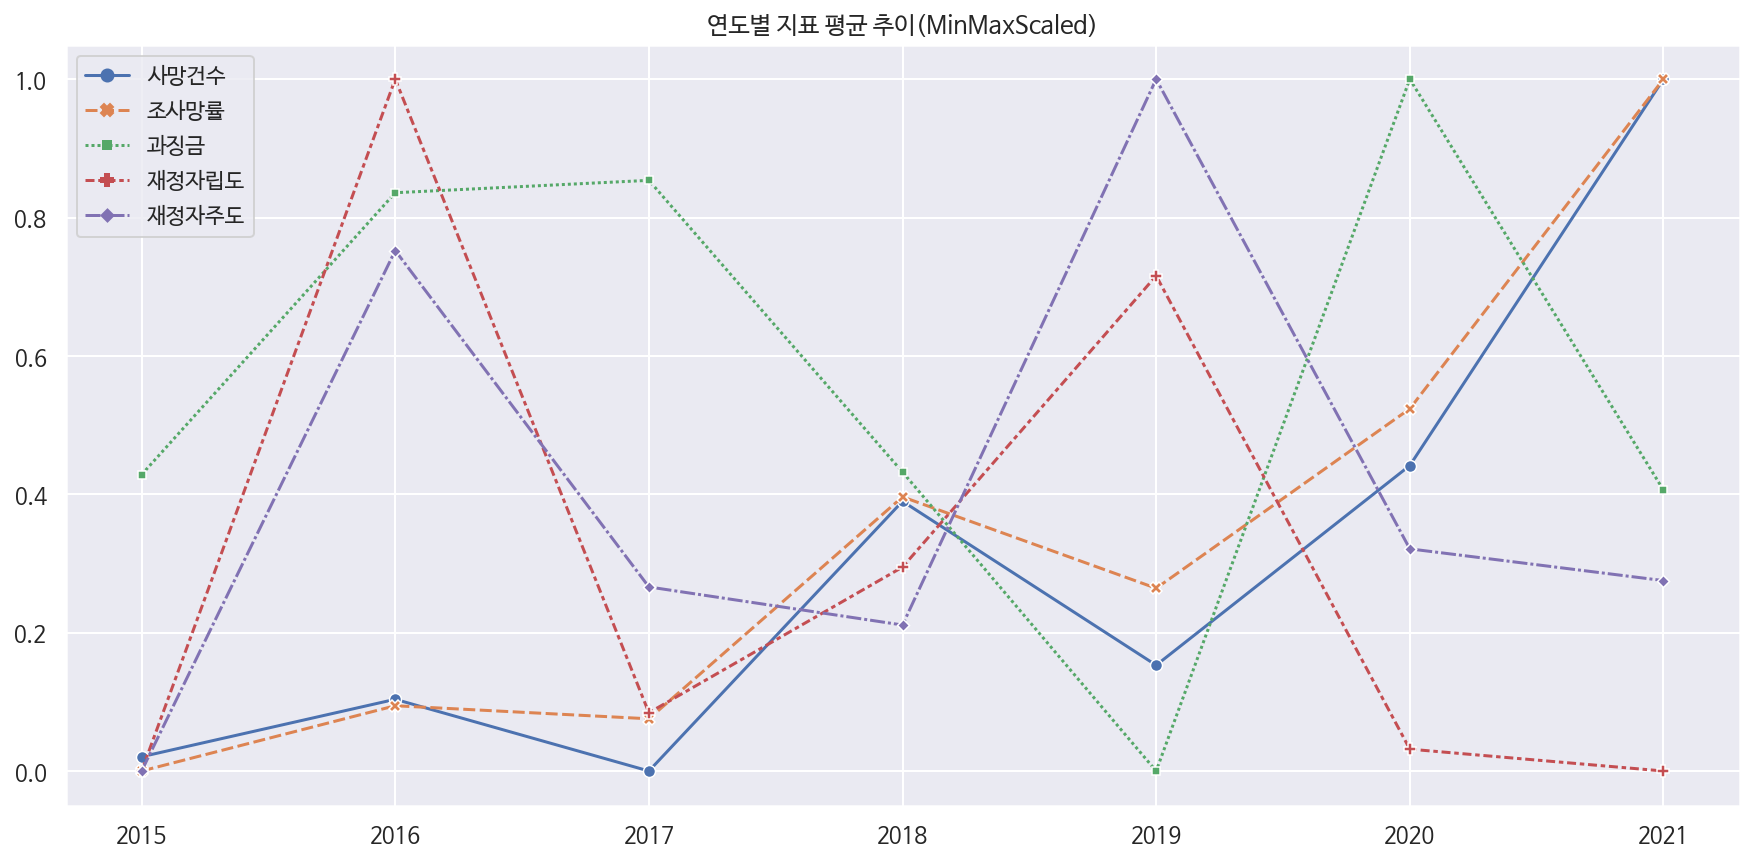

In [ ]:
# 지표 변화 살펴보기
plt.figure(figsize=(15, 7))
sns.lineplot(data=mm(df_data.groupby('연도').mean()), markers=True)
plt.title('연도별 지표 평균 추이(MinMaxScaled)')

Text(0.5, 1.0, '연도별 조사망률 총합 추이')

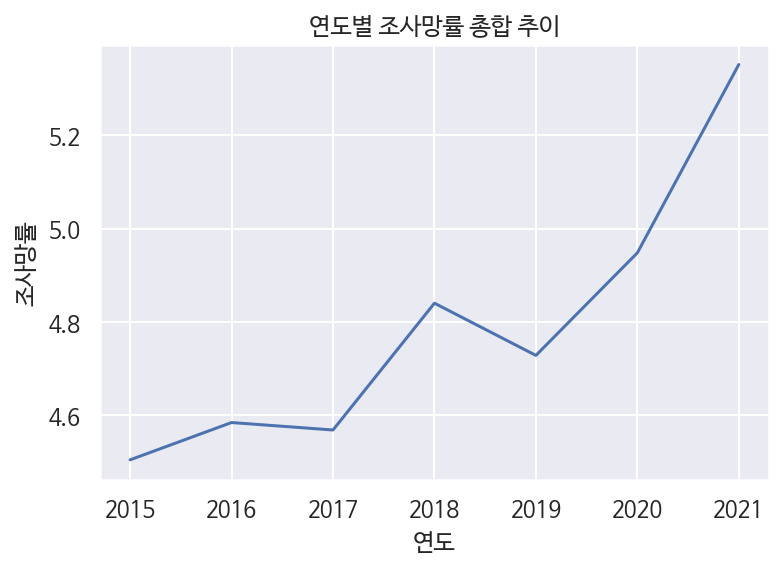

In [ ]:
sns.lineplot(data=df_data.groupby('연도').mean()['조사망률'])
plt.title('연도별 조사망률 총합 추이')

Text(0.5, 1.0, '연도별 사망건수 총합 추이')

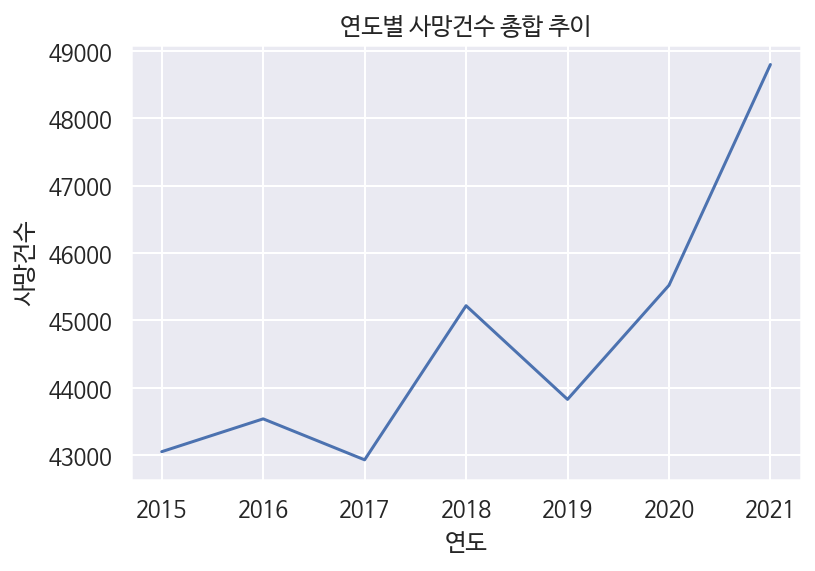

In [ ]:
# 사망건수 총합
sns.lineplot(data=df_data.groupby('연도').sum()['사망건수'])
plt.title('연도별 사망건수 총합 추이')

In [ ]:
# 연도별 사망건수 가장 높은 구는?
df_data.groupby("연도").max()
#-> 모두 중랑구

자치구별  사망건수  조사망률    과징금  재정자립도  재정자주도
연도                                        
2015  중랑구  2763   5.7   9069   57.4   64.9
2016  중랑구  2803   5.7  10150   60.0   67.8
2017  중랑구  2645   5.9   9744   58.4   63.9
2018  중랑구  2896   6.2   8228   58.2   61.8
2019  중랑구  2691   6.0   8660   57.9   66.9
2020  중랑구  2699   6.4  10918   60.0   65.4
2021  중랑구  3007   6.9   8160   54.7   62.2

Text(0.5, 1.0, '연도별 조사망률 총합 추이')

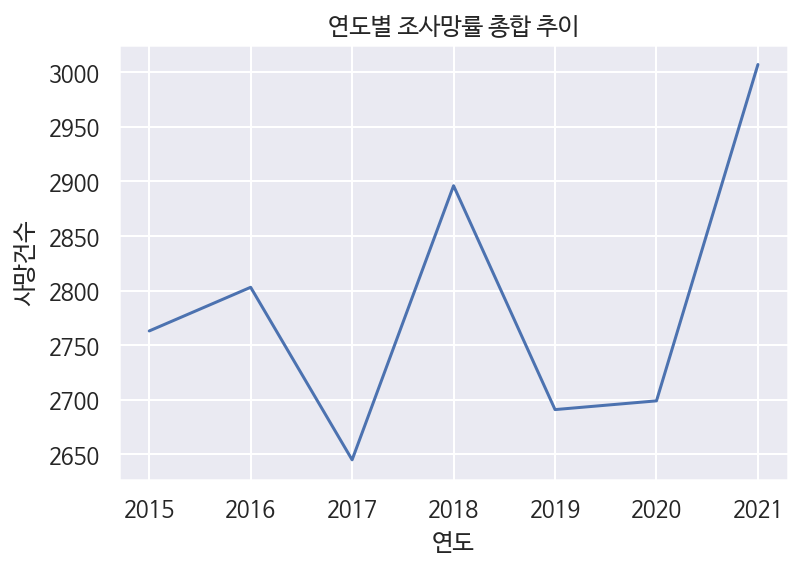

In [ ]:
# 사망건수 max
df_temp = df_data.groupby('연도').max()
sns.lineplot(data=df_temp['사망건수'])
plt.title('연도별 조사망률 총합 추이')

In [ ]:
df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(10)['자치구별']

3      강서구
11     동작구
0      강남구
17     송파구
6      구로구
13    서대문구
23      중구
4      관악구
10    동대문구
2      강북구
Name: 자치구별, dtype: object

In [ ]:
df_data.groupby(["연도", "자치구별"]).mean().reset_index().sort_values(title).head(10)

연도  자치구별    사망건수  조사망률     과징금  재정자립도  재정자주도
81   2018   구로구  1922.0   4.8  4613.0   19.7   38.2
4    2015   관악구  2008.0   4.0  3608.0   21.1   39.5
117  2019   송파구  2278.0   3.4  4422.0   21.9   40.5
150  2021   강남구  1920.0   3.7  1801.0   15.9   40.7
153  2021   강서구  2884.0   5.0  3023.0   17.5   40.8
132  2020   금천구  1245.0   5.5  6506.0   22.2   40.8
61   2017   동작구  1641.0   4.2  1522.0   15.8   41.2
128  2020   강서구  2694.0   4.7  2236.0   15.4   41.2
144  2020  영등포구  1746.0   4.8  4856.0   17.5   42.1
86   2018   동작구  1720.0   4.4  3620.0   17.9   42.1

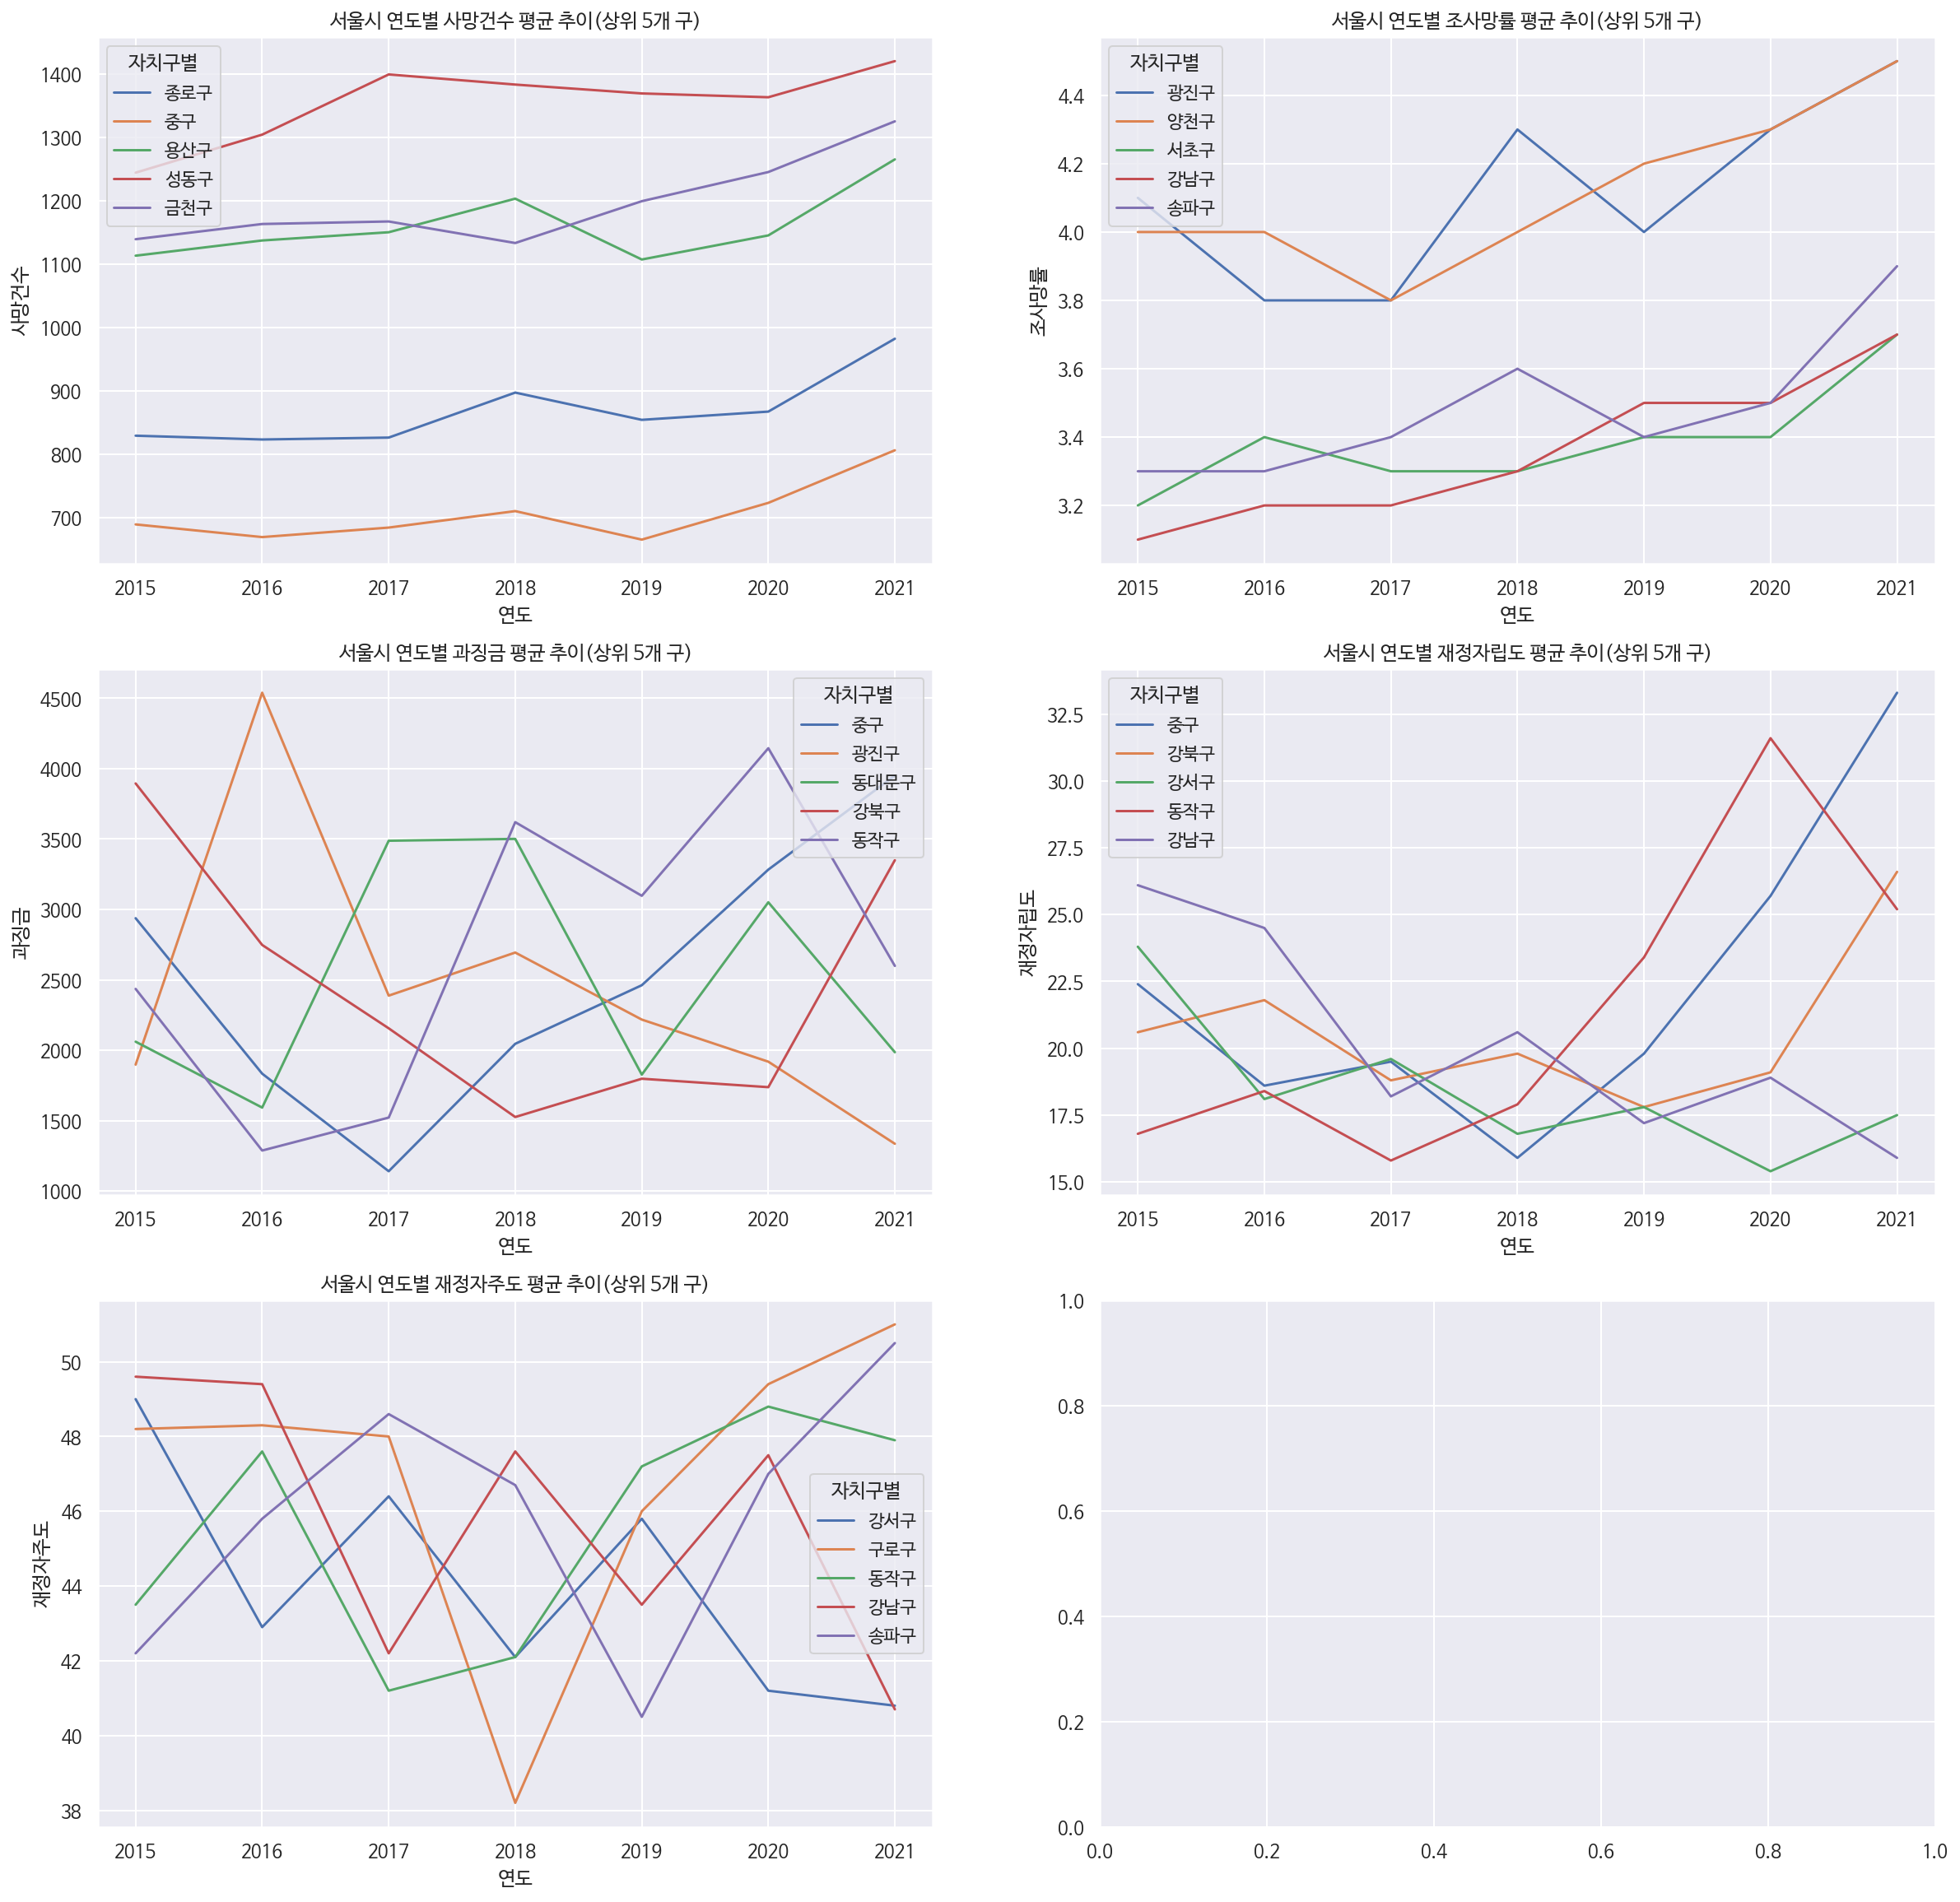

In [ ]:
# 각 지표 상위 5개 구별 추이 살펴보기
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  top_n = df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(5)['자치구별'].values
  df_temp = df_data[df_data['자치구별'].isin(top_n)]
  sns.lineplot(x=df_temp["연도"], y=df_temp[title], hue=df_temp['자치구별'], ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"서울시 연도별 {title} 평균 추이(상위 5개 구)")
  # 지표별 추이가 너무 다르다...

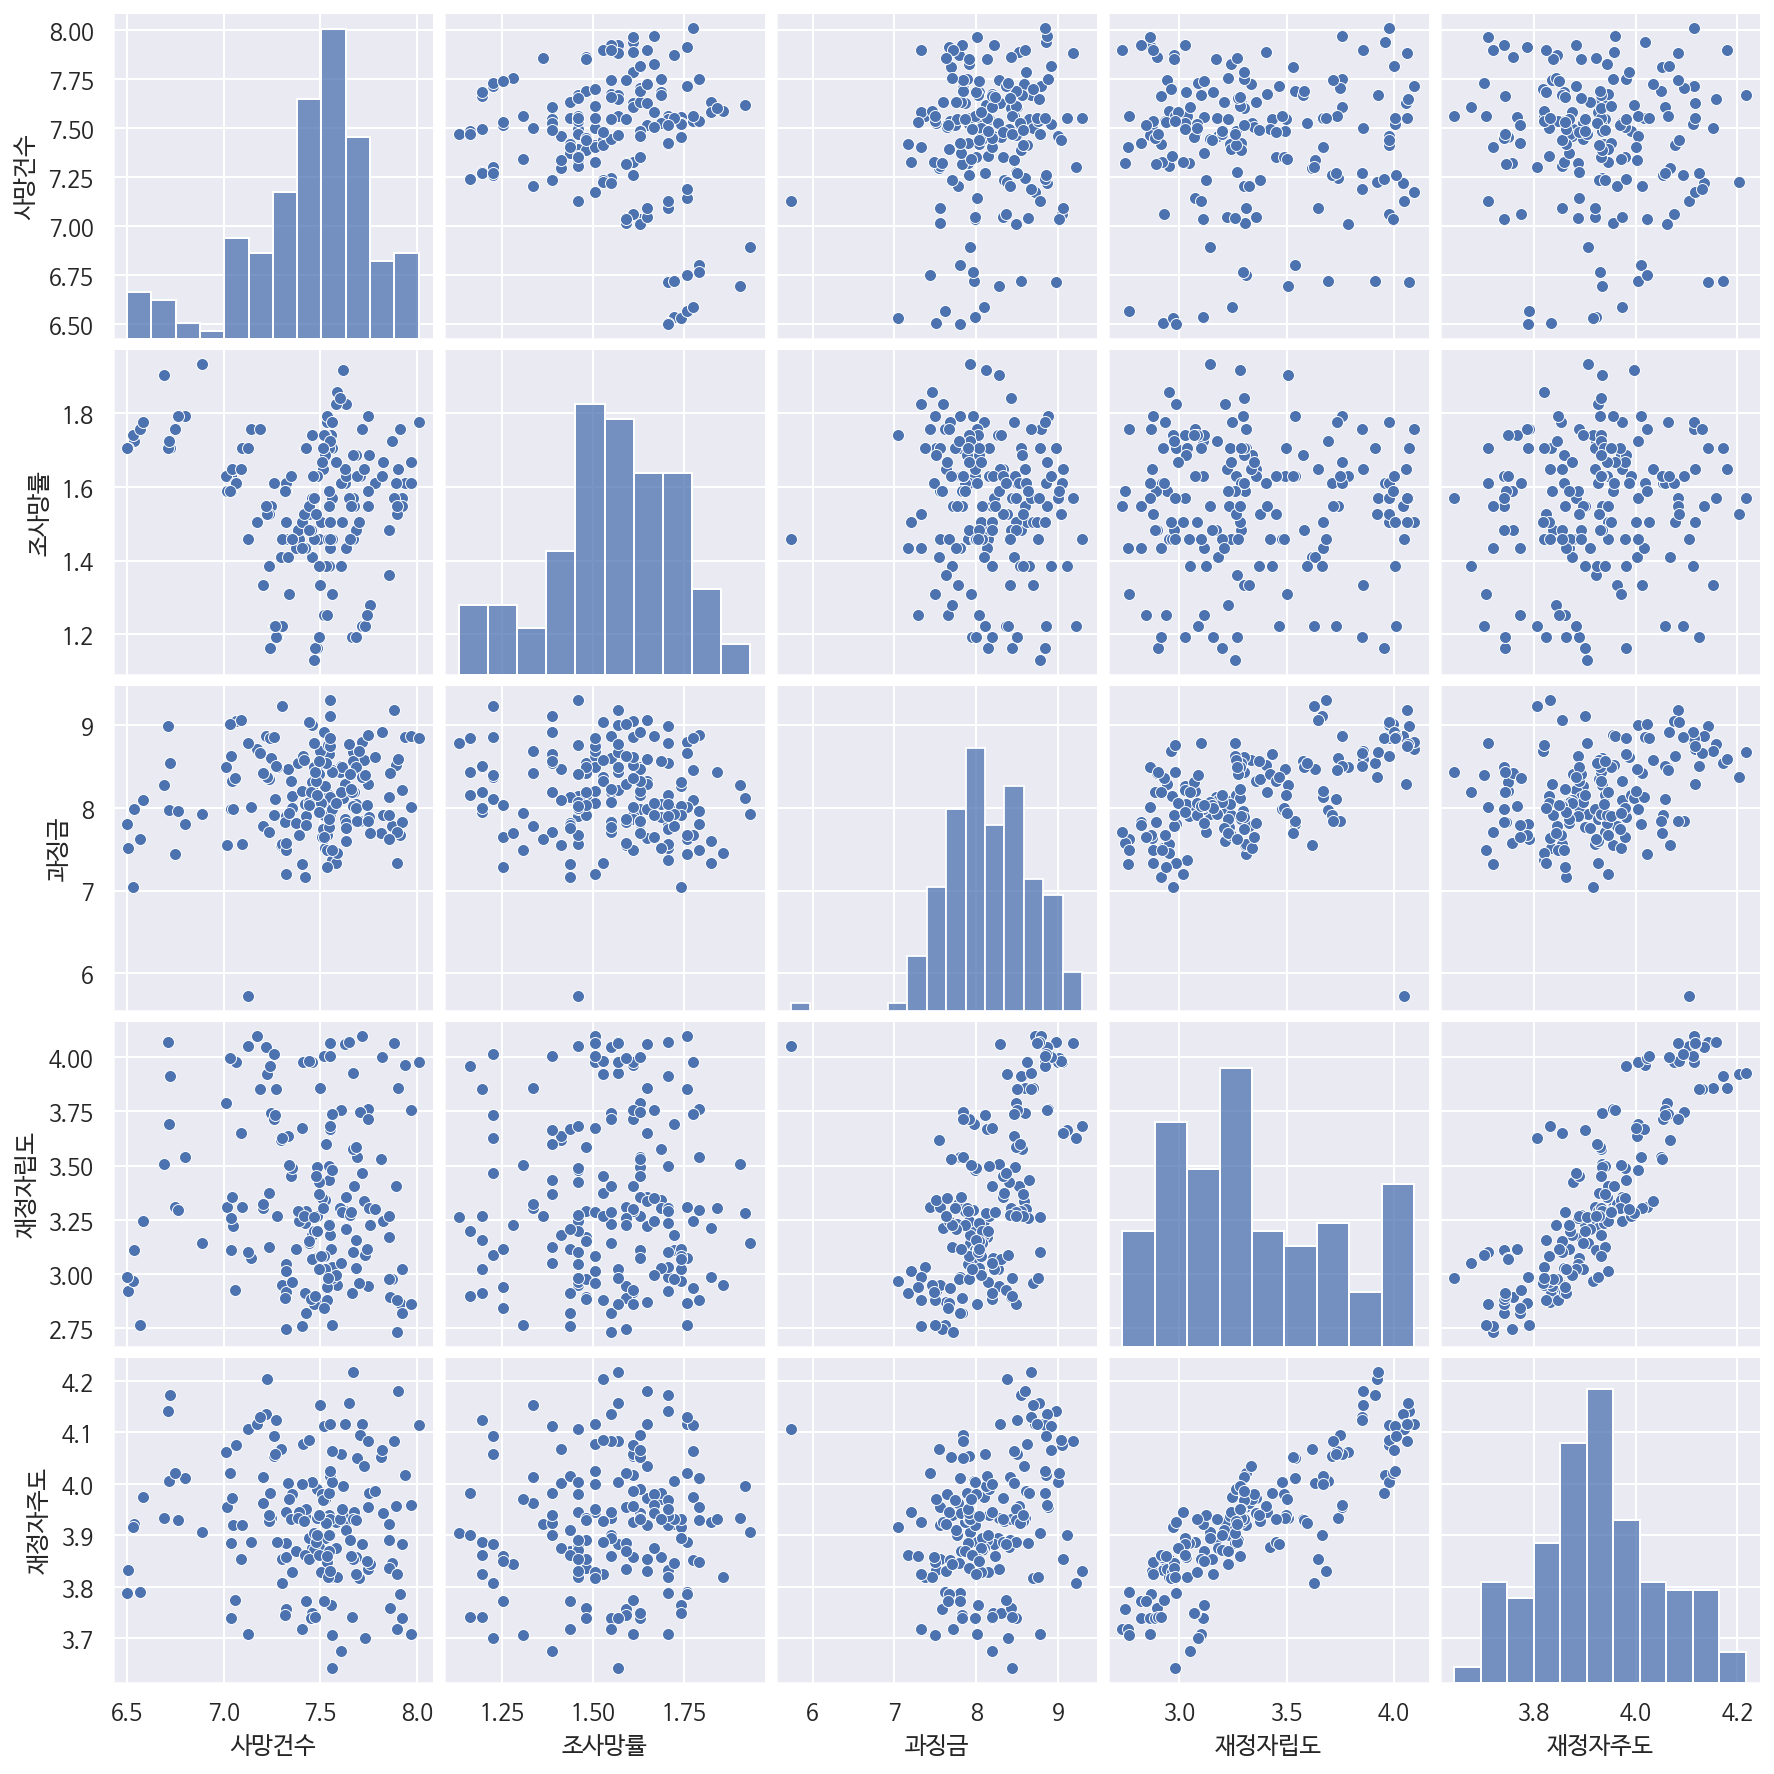

In [ ]:
# 각 항목별 scatter plot 및 히스토그램 보기(pairplot)
sns.pairplot(df_data_log)

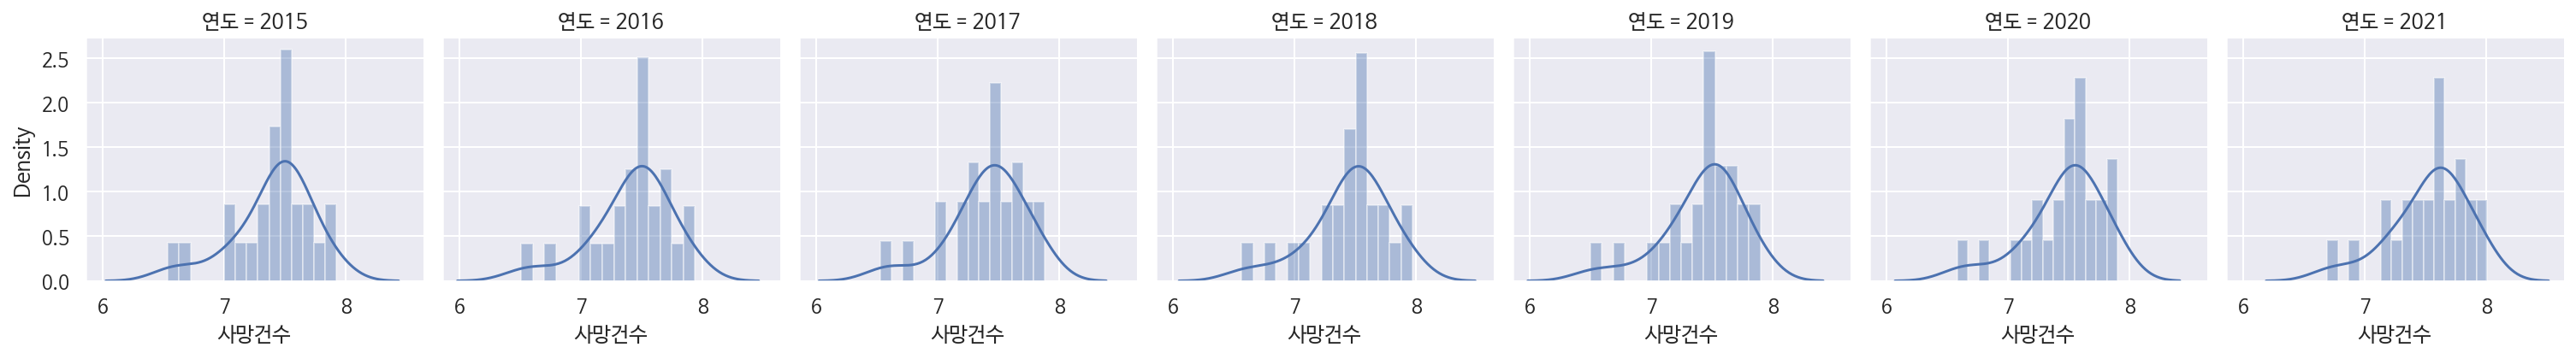

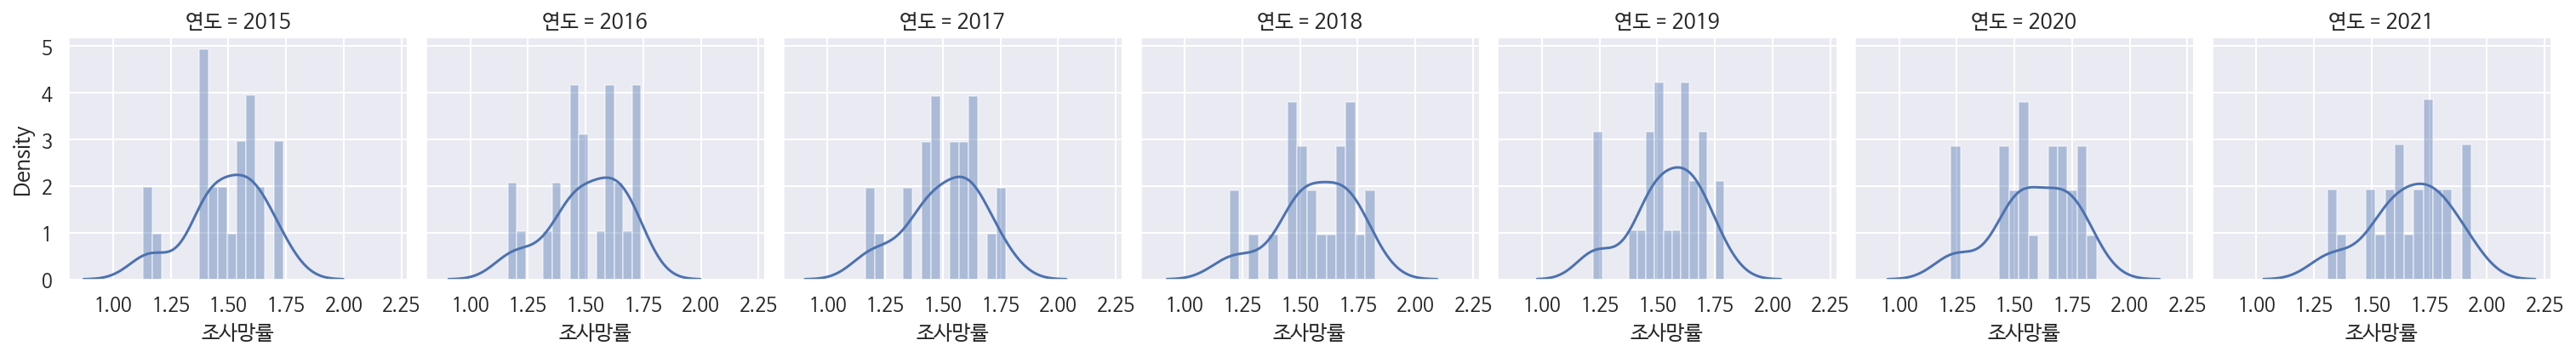

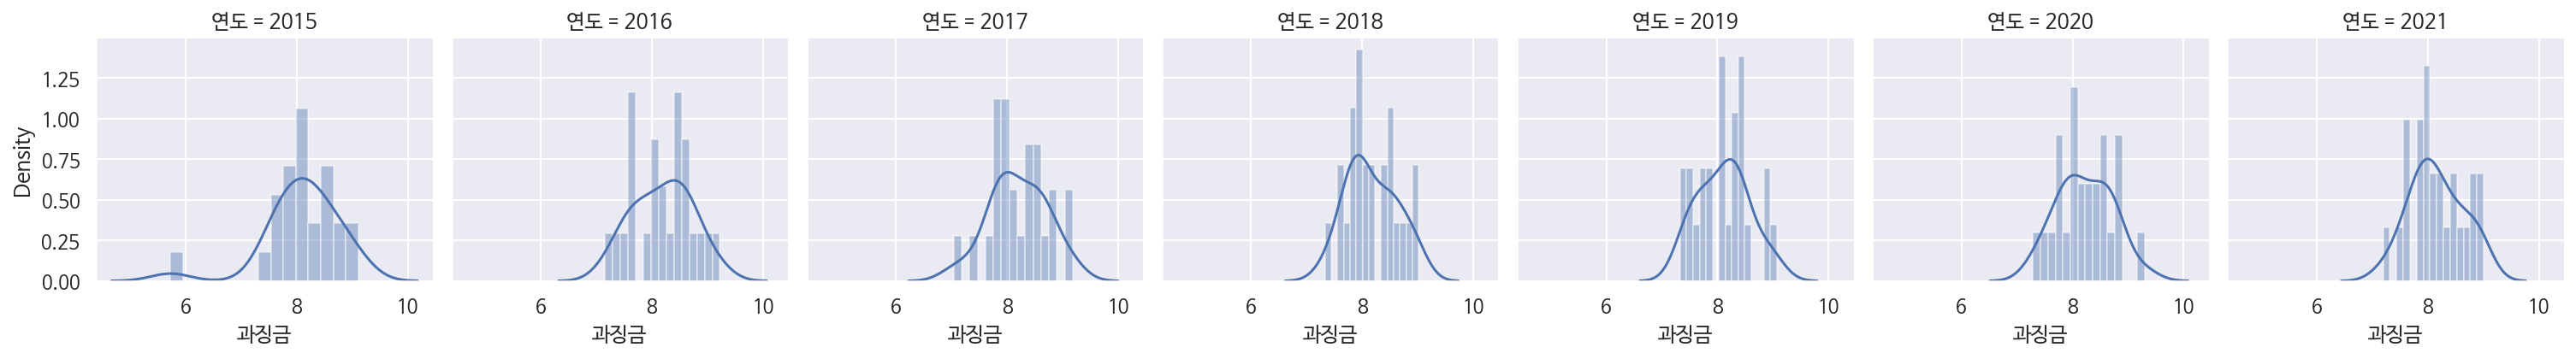

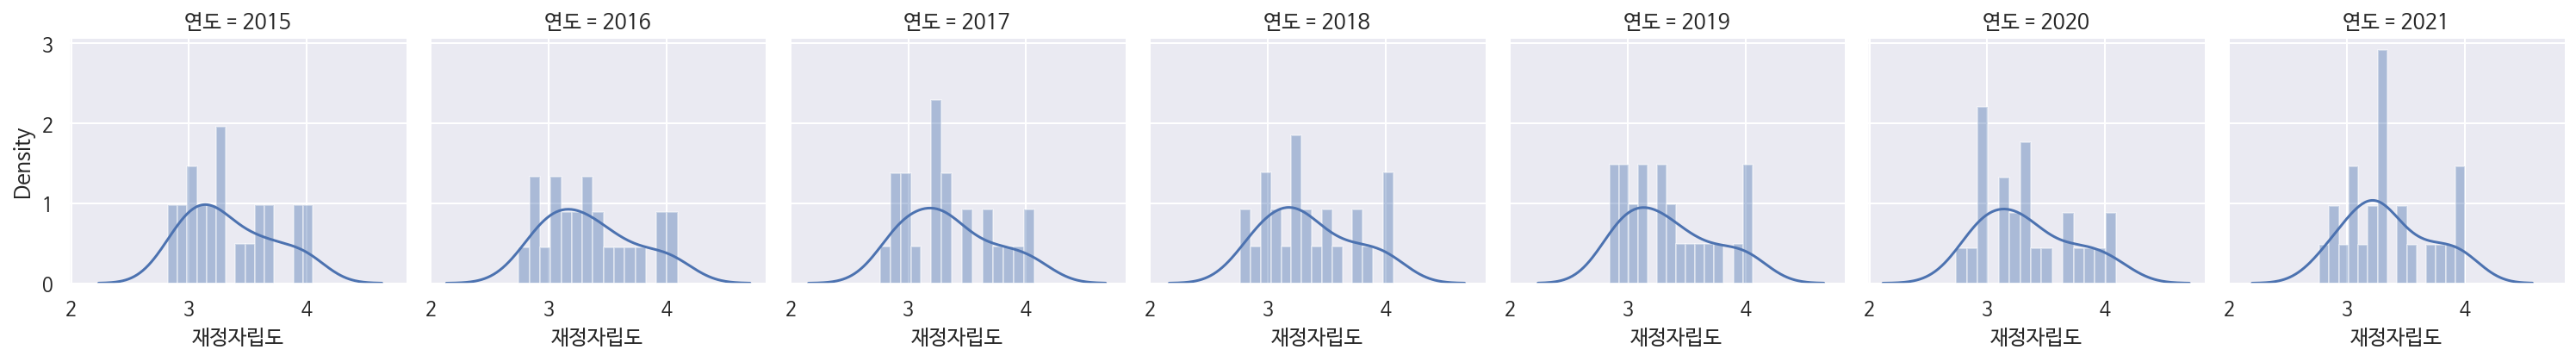

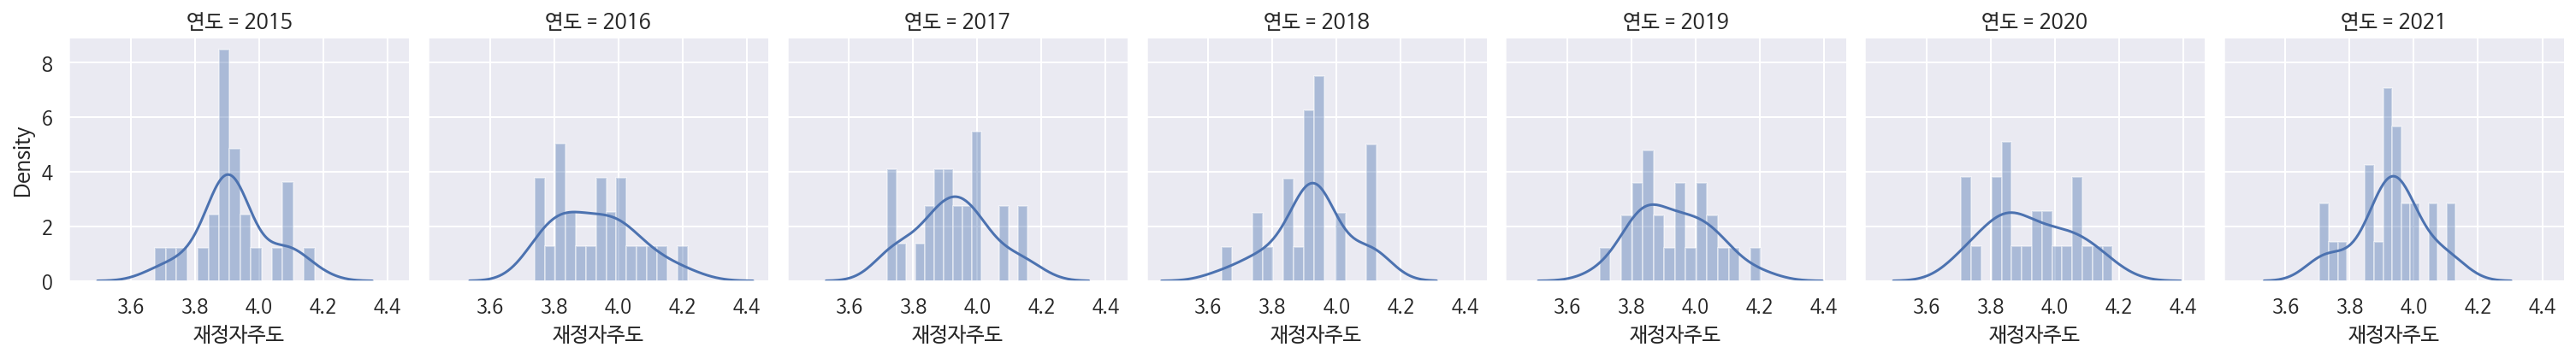

In [ ]:
# 연도별 재정 자립도 distplot 보기

# warning 제거
import warnings
warnings.filterwarnings(action='ignore')

# def plot(*args, **kwargs):
#   # plt.figure(figsize=(28, 4))
#   sns.distplot(*args, **kwargs)
for row in ["사망건수", "조사망률", "과징금", "재정자립도", "재정자주도"]:
  g = sns.FacetGrid(data=df_data_log, col='연도', col_wrap=7)
  g.map(sns.distplot, row, bins=15)

Text(0.5, 1.0, 'correlation p-value(<0.05)')

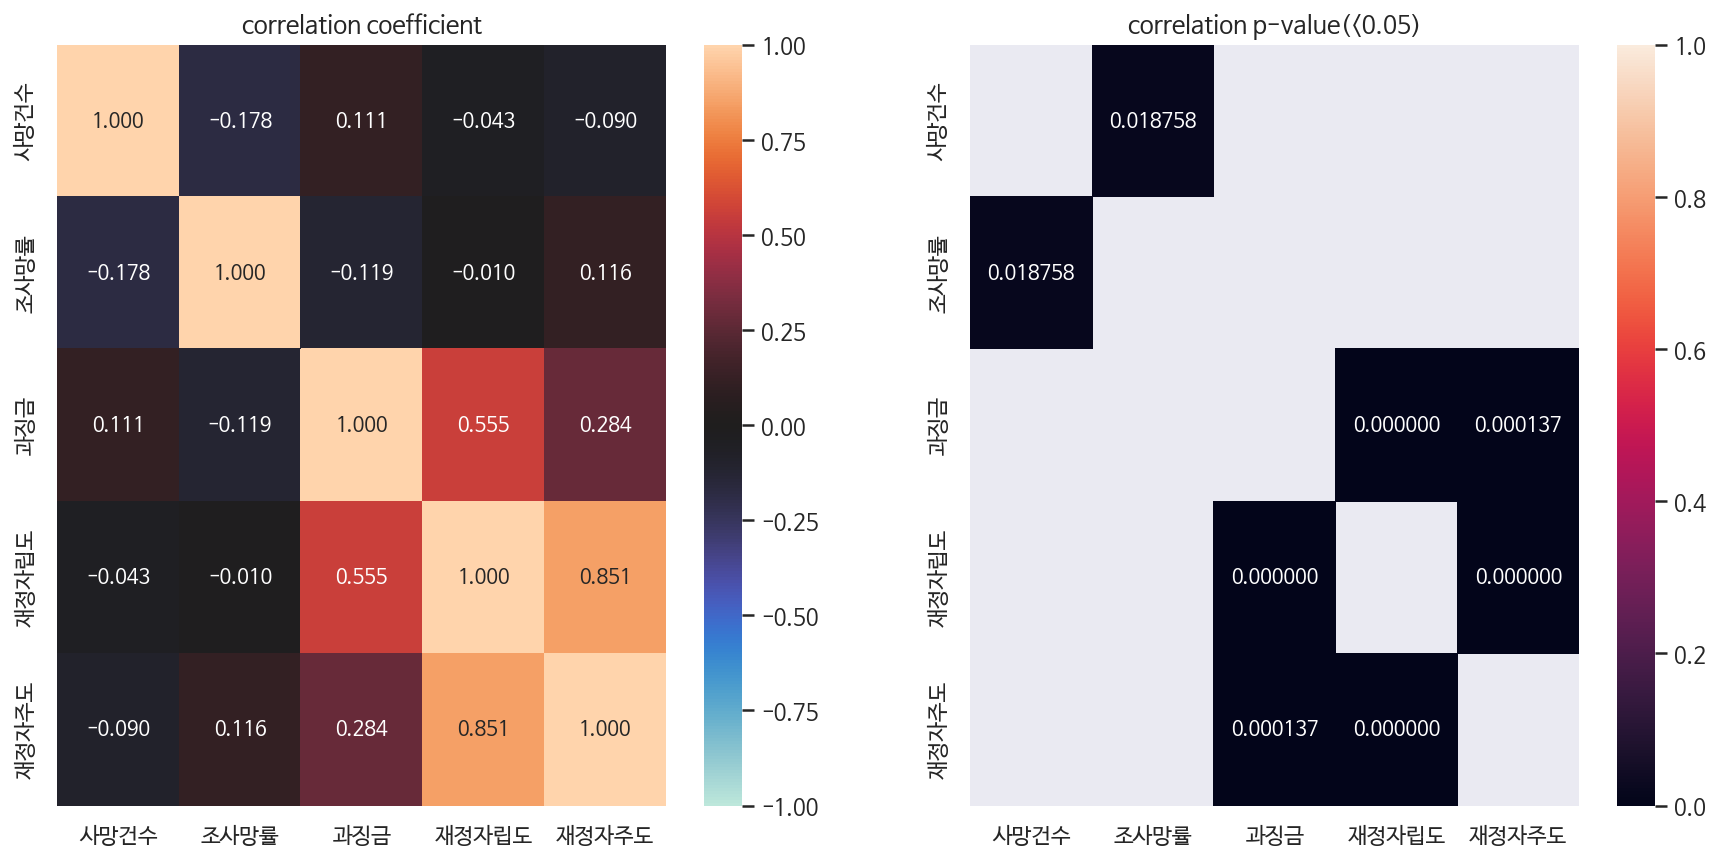

In [ ]:
#단순 pearson 상관분석계수 heatmap화 해보기
#과징금, 재정자립도, 재정자주도로 분석
from scipy.stats import pearsonr

method = pearsonr
df_temp = df_data_log[:]

#log 씌우기
# df_temp[['과징금','재정자립도','재정자주도']] = np.log(df_temp[['과징금','재정자립도','재정자주도']])

fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.heatmap(
    ax=ax1, 
    data=df_temp.corr(method=lambda x, y: method(x, y)[0]), 
    vmin=-1, 
    vmax=1,
    fmt='.3f',
    annot=True,
    cmap='icefire')
ax1.set_title("correlation coefficient")

df_pval = df_temp.corr(method=lambda x, y: method(x, y)[1])
sns.heatmap(
    ax=ax2, 
    data=df_pval,
    mask=df_pval > 0.05, #0.05 이상이면 없앰
    vmin=0, 
    vmax=1,
    fmt='.6f', 
    annot=True
    )
ax2.set_title("correlation p-value(<0.05)")

Text(0.5, 1.0, 'correlation p-value(<0.05)')

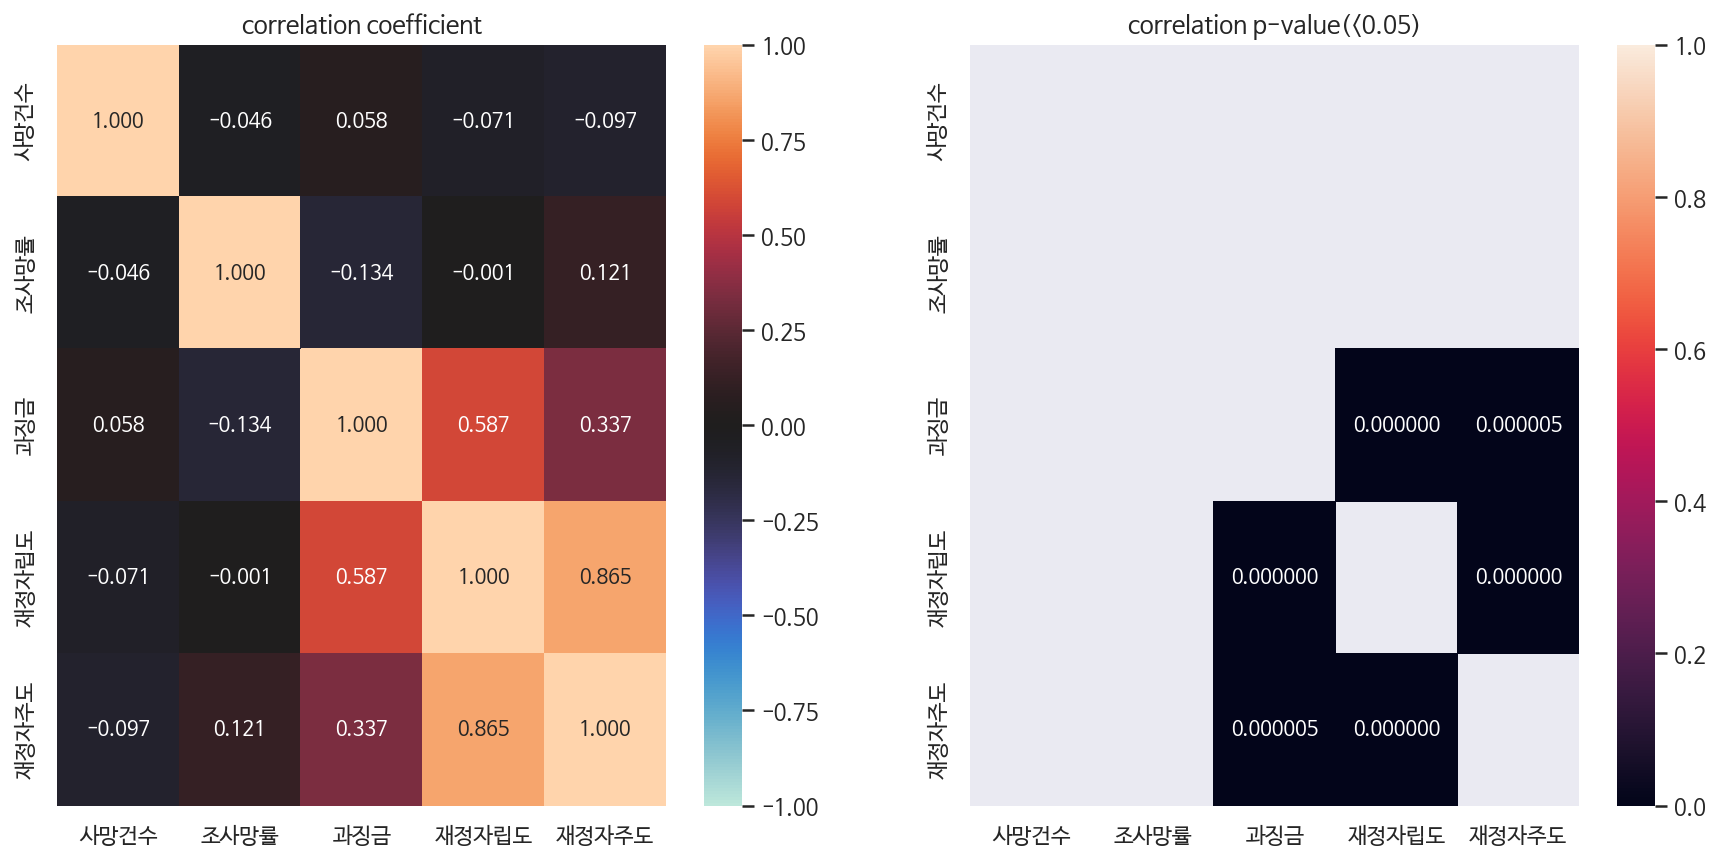

In [ ]:
#단순 pearson 상관분석계수 heatmap화 해보기
#과징금, 재정자립도, 재정자주도로 분석
from scipy.stats import pearsonr, spearmanr

method = spearmanr
df_temp = df_data_log[:]

#log 씌우기
# df_temp[['과징금','재정자립도','재정자주도']] = np.log(df_temp[['과징금','재정자립도','재정자주도']])

fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.heatmap(
    ax=ax1, 
    data=df_temp.corr(method=lambda x, y: method(x, y)[0]), 
    vmin=-1, 
    vmax=1,
    fmt='.3f',
    annot=True,
    cmap='icefire')
ax1.set_title("correlation coefficient")

df_pval = df_temp.corr(method=lambda x, y: method(x, y)[1])
sns.heatmap(
    ax=ax2, 
    data=df_pval,
    mask=df_pval > 0.05, #0.05 이상이면 없앰
    vmin=0, 
    vmax=1,
    fmt='.6f', 
    annot=True
    )
ax2.set_title("correlation p-value(<0.05)")

In [ ]:
df_data_log.groupby('연도').mean()

사망건수      조사망률       과징금     재정자립도     재정자주도
연도                                                    
2015  7.405642  1.492510  8.101076  3.348426  3.923551
2016  7.414608  1.510248  8.187482  3.354059  3.928165
2017  7.403620  1.506277  8.198297  3.344612  3.925133
2018  7.453379  1.563293  8.171000  3.348309  3.924906
2019  7.422900  1.542303  8.112709  3.352605  3.931207
2020  7.461133  1.585007  8.221547  3.340563  3.923886
2021  7.531486  1.663049  8.158063  3.352719  3.926498

In [ ]:
#과징금이 가장 많았던 년도
df_data_log.groupby('연도').mean()

사망건수      조사망률       과징금     재정자립도     재정자주도
연도                                                    
2015  7.405642  1.492510  8.101076  3.348426  3.923551
2016  7.414608  1.510248  8.187482  3.354059  3.928165
2017  7.403620  1.506277  8.198297  3.344612  3.925133
2018  7.453379  1.563293  8.171000  3.348309  3.924906
2019  7.422900  1.542303  8.112709  3.352605  3.931207
2020  7.461133  1.585007  8.221547  3.340563  3.923886
2021  7.531486  1.663049  8.158063  3.352719  3.926498

# 상관분석

## 가설 설정 : 
 귀무가설 :자치구별 재정지표와 사망률은 유의한 상관관계가 없다.

---


 대립가설 :자치구별 재정지표와 사망률은 유의한 상관관계가 있다. 


In [ ]:
df_data["과징금"] = df_data["과징금"].apply(float)
df_data["사망건수"] = df_data["사망건수"].apply(float)
df_data["조사망률"] = df_data["조사망률"].apply(float)
df_data

연도 자치구별    사망건수  조사망률      과징금  재정자립도  재정자주도
0    2015  종로구   829.0   5.5   5154.0   50.0   64.9
1    2016  종로구   823.0   5.5   7971.0   58.6   62.9
2    2017  종로구   826.0   5.6   2905.0   40.1   54.9
3    2018  종로구   897.0   6.0   2450.0   34.5   55.2
4    2019  종로구   854.0   5.8   1698.0   27.4   55.8
..    ...  ...     ...   ...      ...    ...    ...
170  2017  강동구  1877.0   4.3   6379.0   19.7   45.6
171  2018  강동구  1905.0   4.5   6316.0   58.2   61.4
172  2019  강동구  1898.0   4.5   6901.0   54.9   56.0
173  2020  강동구  1901.0   4.3  10918.0   39.8   46.1
174  2021  강동구  2122.0   4.7   3760.0   26.7   47.5

[175 rows x 7 columns]

In [ ]:
df_data["과징금"] = np.log(df_data["과징금"])
df_data["조사망률"] = np.log(df_data["조사망률"])
df_data["재정자립도"] = np.log(df_data["재정자립도"])
df_data["재정자주도"] = np.log(df_data["재정자주도"])


df_data

연도 자치구별    사망건수      조사망률       과징금     재정자립도     재정자주도
0    2015  종로구   829.0  1.704748  8.547528  3.912023  4.172848
1    2016  종로구   823.0  1.704748  8.983565  4.070735  4.141546
2    2017  종로구   826.0  1.722767  7.974189  3.691376  4.005513
3    2018  종로구   897.0  1.791759  7.803843  3.540959  4.010963
4    2019  종로구   854.0  1.757858  7.437206  3.310543  4.021774
..    ...  ...     ...       ...       ...       ...       ...
170  2017  강동구  1877.0  1.458615  8.760767  2.980619  3.819908
171  2018  강동구  1905.0  1.504077  8.750841  4.063885  4.117410
172  2019  강동구  1898.0  1.504077  8.839422  4.005513  4.025352
173  2020  강동구  1901.0  1.458615  9.298168  3.683867  3.830813
174  2021  강동구  2122.0  1.547563  8.232174  3.284664  3.860730

[175 rows x 7 columns]

## 상관 분석 조건 확인

피어슨의 상관계수를 통한 상관분석 진행.

전제 

1. 두 변수는 모두 연속형 변수 (만족)
2. 두 변수중 적어도 한 변수는 정규성 만족해야함 (만족)

In [ ]:
df_2015 = df_data[df_data["연도"]=="2015"]
df_2015
df_2016 = df_data[df_data["연도"]=="2016"]
df_2016
df_2017 = df_data[df_data["연도"]=="2017"]
df_2017
df_2018 = df_data[df_data["연도"]=="2018"]
df_2018
df_2019 = df_data[df_data["연도"]=="2019"]
df_2019
df_2020 = df_data[df_data["연도"]=="2020"]
df_2020
df_2021 = df_data[df_data["연도"]=="2021"]
df_2021

연도  자치구별    사망건수      조사망률       과징금     재정자립도     재정자주도
6    2021   종로구   982.0  1.931521  7.924072  3.144152  3.906005
13   2021    중구   806.0  1.902108  8.281724  3.505557  3.933784
20   2021   용산구  1265.0  1.757858  8.008366  3.072693  3.887730
27   2021   성동구  1420.0  1.609438  7.914983  3.713572  4.053523
34   2021   광진구  1516.0  1.504077  7.197435  3.015535  3.945458
41   2021  동대문구  2061.0  1.824549  7.593878  3.210844  3.925926
48   2021   중랑구  2319.0  1.791759  8.881975  3.758872  3.955082
55   2021   성북구  2320.0  1.686399  7.894691  3.303217  3.981549
62   2021   강북구  2036.0  1.916923  8.116716  3.280911  3.996364
69   2021   도봉구  2004.0  1.840550  8.431417  3.303217  3.931826
76   2021   노원구  3007.0  1.774952  8.848509  3.977811  4.114147
83   2021   은평구  2735.0  1.757858  7.674153  2.867899  3.786460
90   2021  서대문구  1728.0  1.740466  8.306966  3.068053  3.749504
97   2021   마포구  1735.0  1.568616  9.006999  3.975936  4.003690
104  2021   양천구  2027.0  1.504077  8.492080  3.284664  3.951244
111  2021   강서구  2884.0  1.609438  8.014005  2.862201  3.708682
118  2021   구로구  2137.0  1.686399  8.563504  3.575151  3.931826
125  2021   금천구  1325.0  1.757858  8.667508  3.850148  4.130355
132  2021  영등포구  1958.0  1.667707  8.061171  2.995732  3.875359
139  2021   동작구  1890.0  1.589235  7.862882  3.226844  3.869116
146  2021   관악구  2481.0  1.629241  8.911125  4.001864  4.065602
153  2021   서초구  1541.0  1.308333  7.939159  3.502550  3.970292
160  2021   강남구  1920.0  1.308333  7.496097  2.766319  3.706228
167  2021   송파구  2579.0  1.360977  7.629976  3.269569  3.921973
174  2021   강동구  2122.0  1.547563  8.232174  3.284664  3.860730

### 1. 정규성 검증

In [ ]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#연도별 사망률 data 정규성 검정      #2015~2021년
print("year : 2015")
print("조사망률",shapiro(df_2015["조사망률"]))
print("기각 : 과징금",shapiro(df_2015["과징금"]))         
print("재정자립도",shapiro(df_2015["재정자립도"]))
print("재정자주도",shapiro(df_2015["재정자주도"]))
print()
print("year : 2016")
print("조사망률",shapiro(df_2016["조사망률"]))
print("과징금",shapiro(df_2016["과징금"]))
print("재정자립도",shapiro(df_2016["재정자립도"]))
print("재정자주도",shapiro(df_2016["재정자주도"]))
print()
print("year : 2017")
print("조사망률",shapiro(df_2017["조사망률"]))
print("과징금",shapiro(df_2017["과징금"]))
print("재정자립도",shapiro(df_2017["재정자립도"]))
print("재정자주도",shapiro(df_2017["재정자주도"]))
print()
print("year : 2018")
print("조사망률",shapiro(df_2018["조사망률"]))
print("과징금",shapiro(df_2018["과징금"]))
print("재정자립도",shapiro(df_2018["재정자립도"]))
print("재정자주도",shapiro(df_2018["재정자주도"]))
print()
print("year : 2019")
print("조사망률",shapiro(df_2019["조사망률"]))
print("과징금",shapiro(df_2019["과징금"]))
print("재정자립도",shapiro(df_2019["재정자립도"]))
print("재정자주도",shapiro(df_2019["재정자주도"]))
print()
print("year : 2020")
print("조사망률",shapiro(df_2020["조사망률"]))
print("과징금",shapiro(df_2020["과징금"]))
print("재정자립도",shapiro(df_2020["재정자립도"]))
print("재정자주도",shapiro(df_2020["재정자주도"]))
print()
print("year : 2021")
print("조사망률",shapiro(df_2021["조사망률"]))
print("과징금",shapiro(df_2021["과징금"]))
print("재정자립도",shapiro(df_2021["재정자립도"]))
print("재정자주도",shapiro(df_2021["재정자주도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  (적어도 한 변수가 정규성) 을 만족해야 피어슨 검정 가능
# 사망률이 정규성을 띄므로 사망률과 재정지표(변수3개) 간의 상관분석 가능. (적어도 한 변수가 정규)
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  (적어도 한 변수가 정규성) 을 만족해야 피어슨 검정 가능
# 사망률이 정규성을 띄므로 사망률과 재정지표(변수3개) 간의 상관분석 가능. (적어도 한 변수가 정규)

year : 2015
조사망률 ShapiroResult(statistic=0.9393413662910461, pvalue=0.1429327130317688)
기각 : 과징금 ShapiroResult(statistic=0.8682966828346252, pvalue=0.003999457694590092)
재정자립도 ShapiroResult(statistic=0.9336947202682495, pvalue=0.10579819232225418)
재정자주도 ShapiroResult(statistic=0.9518082737922668, pvalue=0.27528464794158936)

year : 2016
조사망률 ShapiroResult(statistic=0.9366828799247742, pvalue=0.12406135350465775)
과징금 ShapiroResult(statistic=0.9819969534873962, pvalue=0.921605110168457)
재정자립도 ShapiroResult(statistic=0.9458248019218445, pvalue=0.20153343677520752)
재정자주도 ShapiroResult(statistic=0.9641083478927612, pvalue=0.502192497253418)

year : 2017
조사망률 ShapiroResult(statistic=0.9534679651260376, pvalue=0.2996996343135834)
과징금 ShapiroResult(statistic=0.982795000076294, pvalue=0.9343043565750122)
재정자립도 ShapiroResult(statistic=0.938782274723053, pvalue=0.13874153792858124)
재정자주도 ShapiroResult(statistic=0.9687470197677612, pvalue=0.6134791970252991)

year : 2018
조사망률 ShapiroResult(statist

In [ ]:
print("year : 2015")
print("조사망률 - 과징금",pearsonr(df_2015["조사망률"],df_2015["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2015["조사망률"],df_2015["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2015["조사망률"],df_2015["재정자주도"])[1])
print()
print("year : 2016")
print("조사망률 - 과징금",pearsonr(df_2016["조사망률"],df_2016["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2016["조사망률"],df_2016["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2016["조사망률"],df_2016["재정자주도"])[1])
print()
print("year : 2017")
print("조사망률 - 과징금",pearsonr(df_2017["조사망률"],df_2017["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2017["조사망률"],df_2017["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2017["조사망률"],df_2017["재정자주도"])[1])
print()
print("year : 2018")
print("조사망률 - 과징금",pearsonr(df_2018["조사망률"],df_2018["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2018["조사망률"],df_2018["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2018["조사망률"],df_2018["재정자주도"])[1])
print()
print("year : 2019")
print("조사망률 - 과징금",pearsonr(df_2019["조사망률"],df_2019["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2019["조사망률"],df_2019["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2019["조사망률"],df_2019["재정자주도"])[1])
print()
print("year : 2020")
print("조사망률 - 과징금",pearsonr(df_2020["조사망률"],df_2020["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2020["조사망률"],df_2020["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2020["조사망률"],df_2020["재정자주도"])[1])
print()
print("year : 2021")
print("조사망률 - 과징금",pearsonr(df_2021["조사망률"],df_2021["과징금"])[1]) #p값 검증해보기.
print("조사망률 - 재정자립도",pearsonr(df_2021["조사망률"],df_2021["재정자립도"])[1])
print("조사망률 - 재정자주도",pearsonr(df_2021["조사망률"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 클 경우 상관계수가 유의미하지않음.
# 따라서 상관계수가 유의미하지 않기 때문에, 가설을 수정한다.

year : 2015
조사망률 - 과징금 0.361574474888479
조사망률 - 재정자립도 0.5732592160082303
조사망률 - 재정자주도 0.25640736311127166

year : 2016
조사망률 - 과징금 0.20440139729299306
조사망률 - 재정자립도 0.8632117061333274
조사망률 - 재정자주도 0.440800831361301

year : 2017
조사망률 - 과징금 0.24002063343381078
조사망률 - 재정자립도 0.8667873041493086
조사망률 - 재정자주도 0.47470030976738936

year : 2018
조사망률 - 과징금 0.09396717211378477
조사망률 - 재정자립도 0.3907075185680479
조사망률 - 재정자주도 0.6718026725373822

year : 2019
조사망률 - 과징금 0.17217276874093265
조사망률 - 재정자립도 0.9638899603453214
조사망률 - 재정자주도 0.34602519598240666

year : 2020
조사망률 - 과징금 0.6889998042715648
조사망률 - 재정자립도 0.9477131684383946
조사망률 - 재정자주도 0.8642103736167599

year : 2021
조사망률 - 과징금 0.15945480579141127
조사망률 - 재정자립도 0.5434161625484777
조사망률 - 재정자주도 0.3462139546421821


피어슨의 상관계수를 통한 상관분석 진행결과 :
p값이 0.05보다 클 경우 상관계수가 유의미하지않음.
# 따라서 상관계수가 유의미하지 않기 때문에, 가설을 수정한다


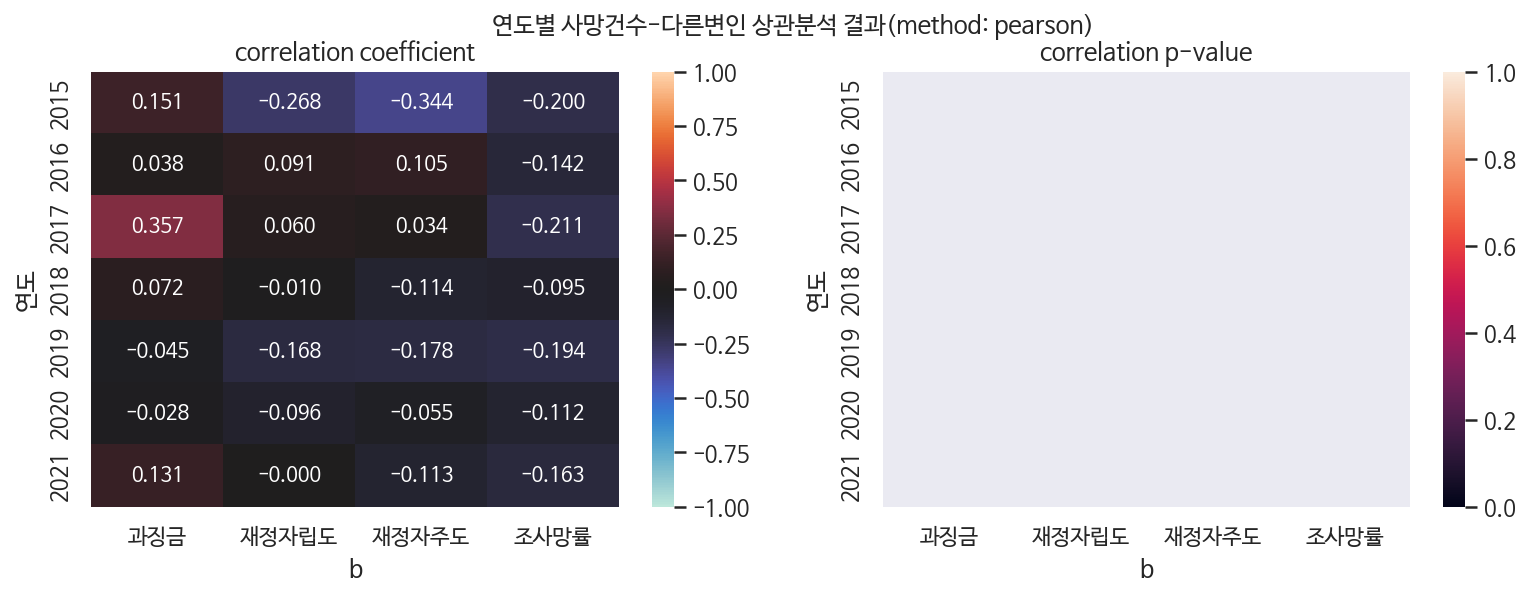

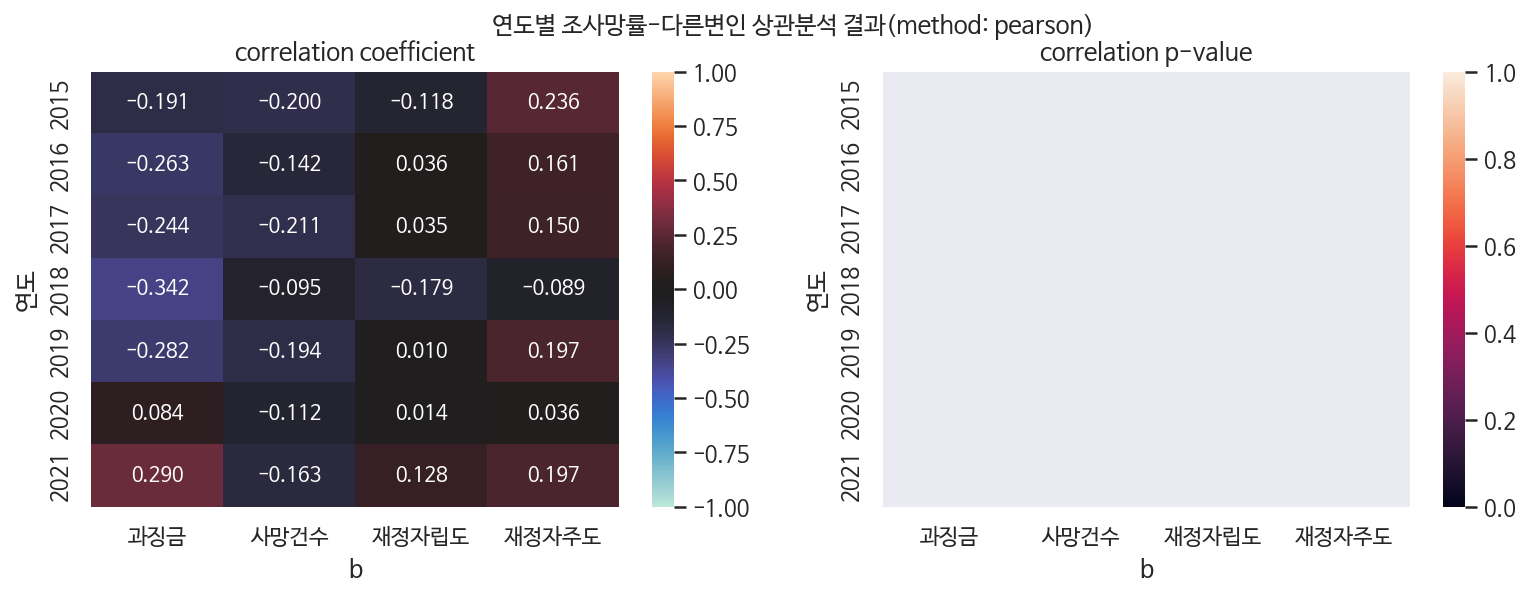

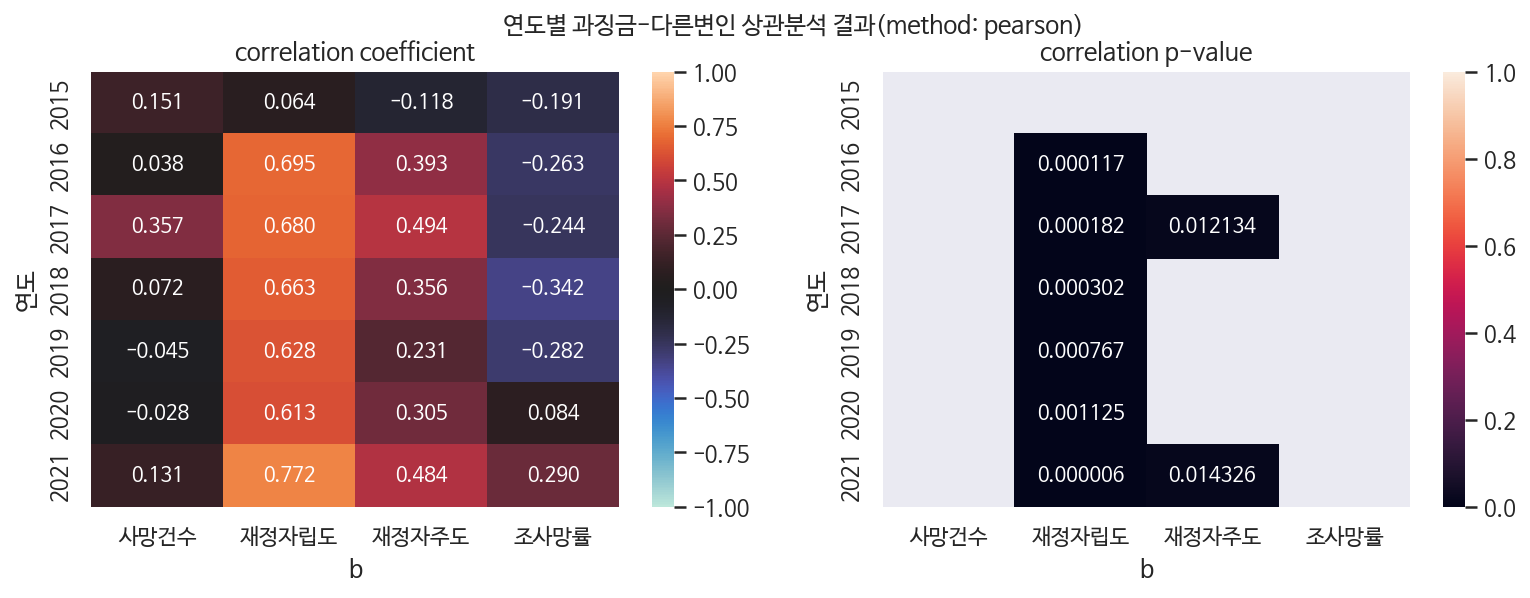

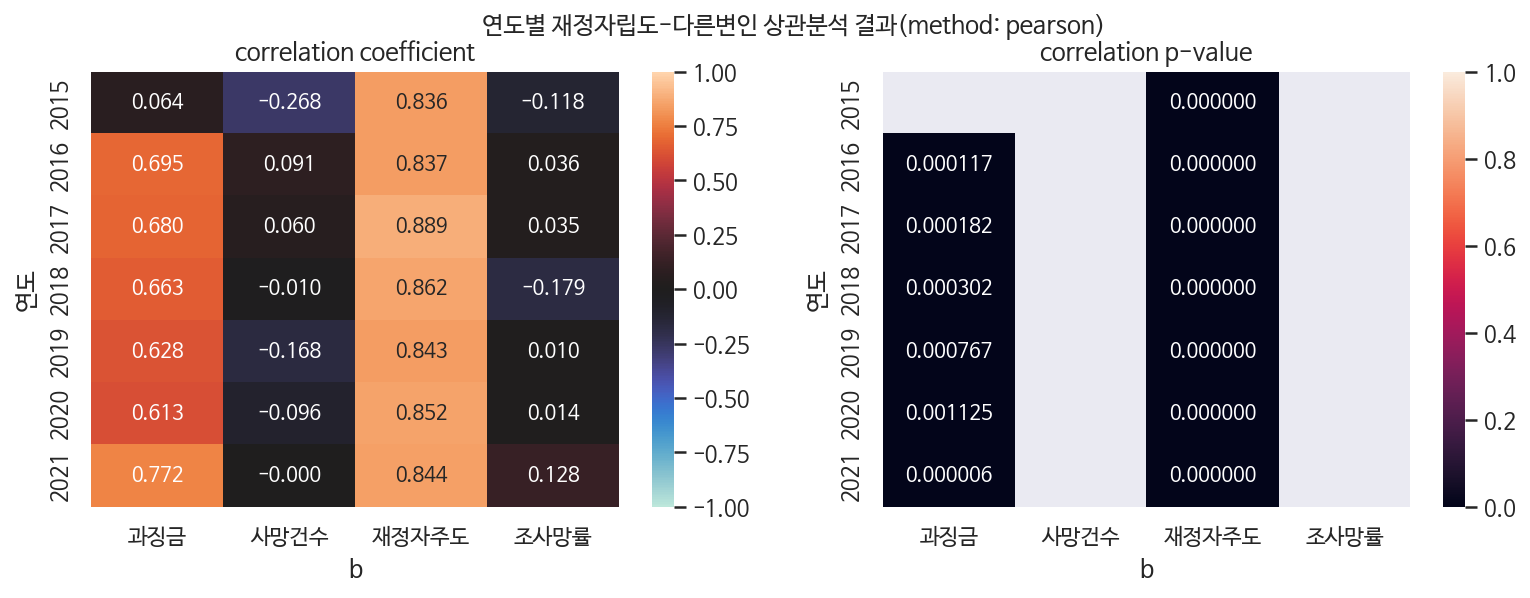

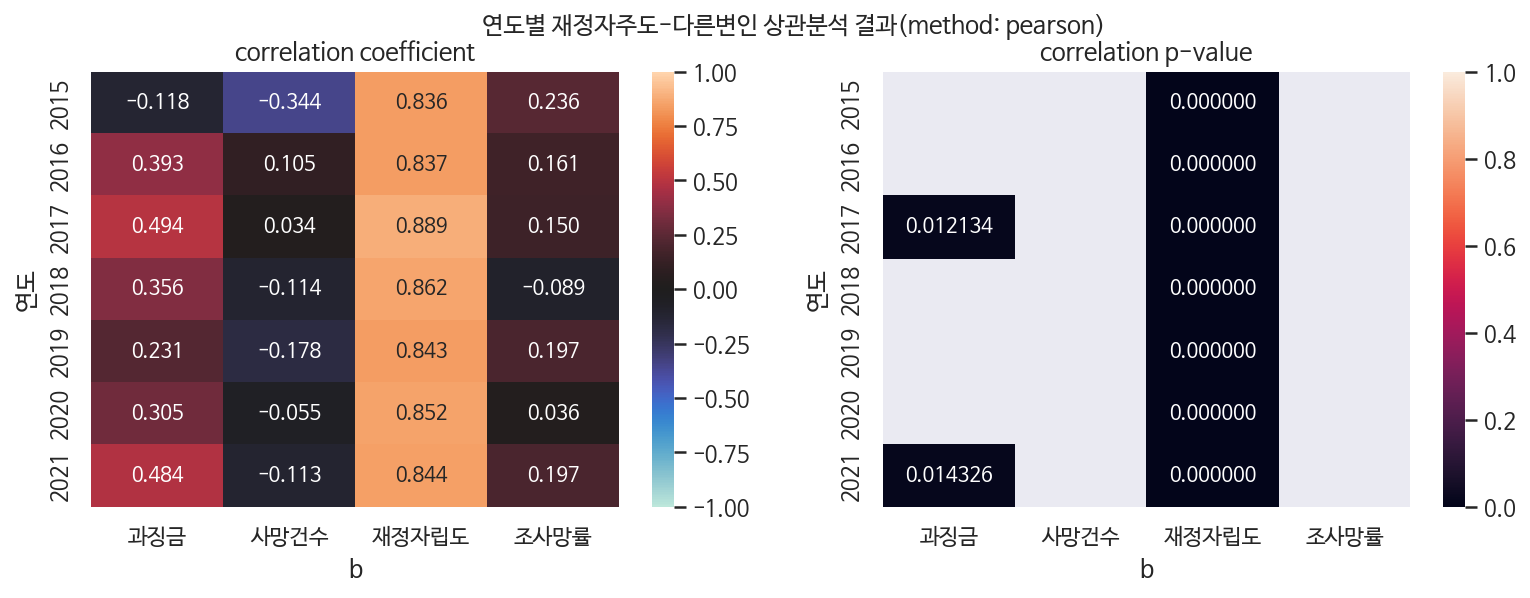

In [ ]:
#spearman 상관분석계수 heatmap화 해보기
#각 변인마다 연도별로 다른 변인과의 상관계수 구하기
from scipy.stats import pearsonr, spearmanr

#상관분석 방법
method = pearsonr


factors = ['사망건수', '조사망률', '과징금', '재정자립도', '재정자주도']
for factor_a in factors:
  df_corr = pd.DataFrame(columns=['연도', 'a', 'b', 'p-value', 'coef'])
  i = 0
  for year in df_data['연도'].unique():
    df_temp = df_data[df_data['연도']==year][:]
    f_ = factors[:]
    f_.remove(factor_a)
    columns = f_
    for colname in columns:
      coef, pvalue = method(df_temp[factor_a], df_temp[colname])
      df_corr.loc[i] = [year, factor_a, colname, pvalue, coef]
      i += 1 
  fig, ax = plt.subplots(1, 2, figsize=(13, 4)) 
  sns.heatmap(
      ax=ax[0], 
      data=df_corr.pivot('연도', 'b', 'coef'), 
      vmin=-1, 
      vmax=1,
      fmt='.3f',
      annot=True,
      cmap='icefire')
  ax[0].set_title("correlation coefficient")
  df_pval = df_corr.pivot('연도', 'b', 'p-value')
  sns.heatmap(
      ax=ax[1], 
      data=df_pval,
      mask=df_pval > 0.05, #0.05 이상이면 없앰
      vmin=0, 
      vmax=1,
      fmt='.6f', 
      annot=True
      )
  ax[1].set_title("correlation p-value")
  fig.suptitle(f'연도별 {factor_a}-다른변인 상관분석 결과(method: pearson)')
  fig.show()
#스피어만 상관계수에서는 2018년에 유의미한 수치가 나왔음을 확인할 수 있음

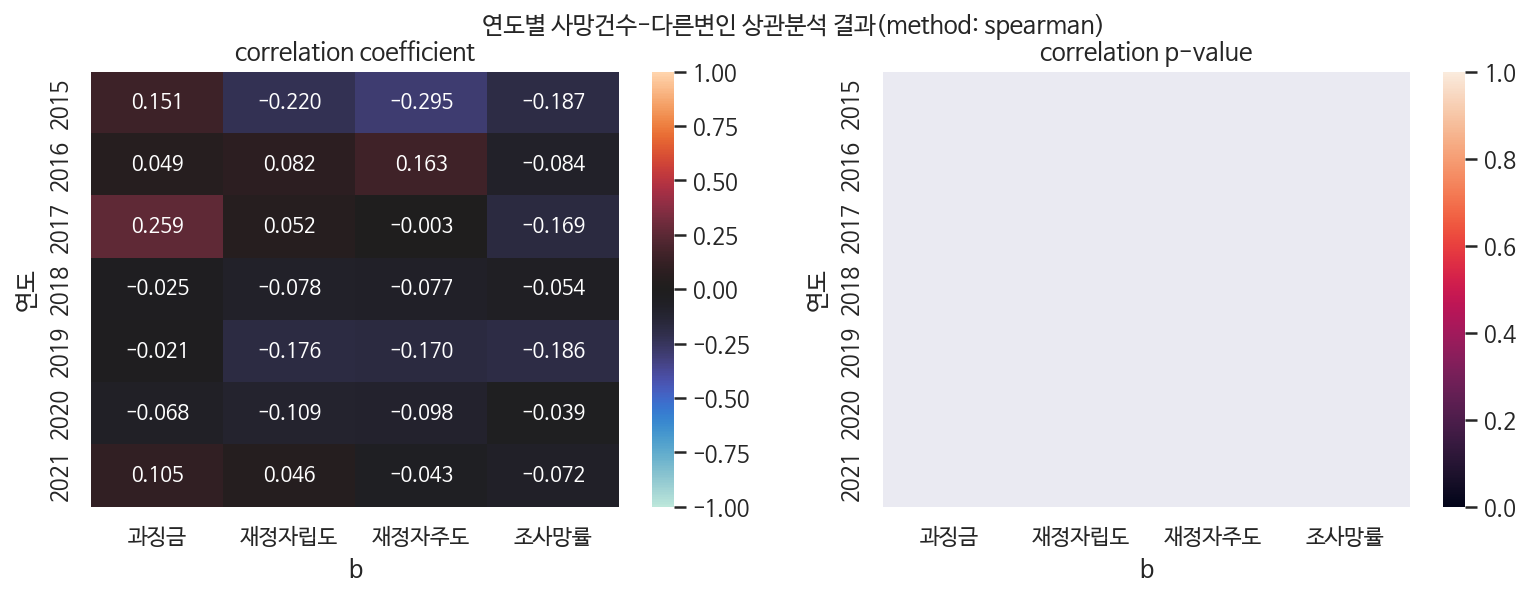

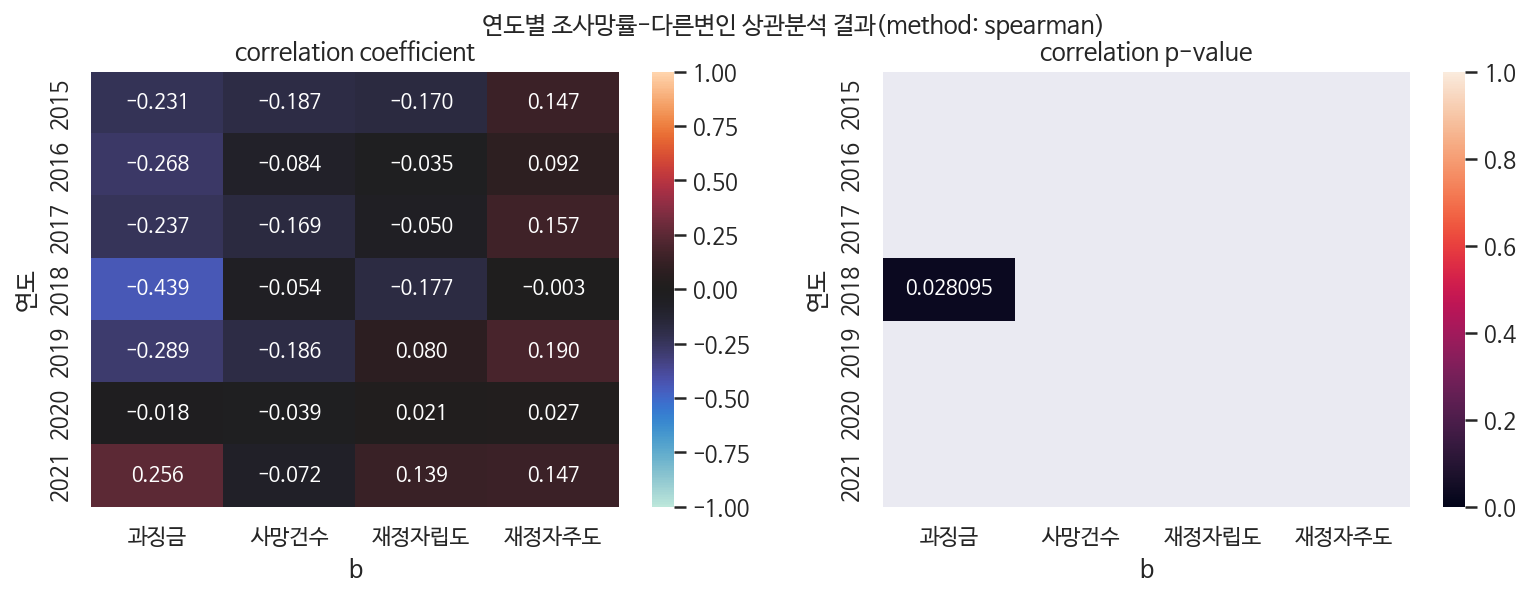

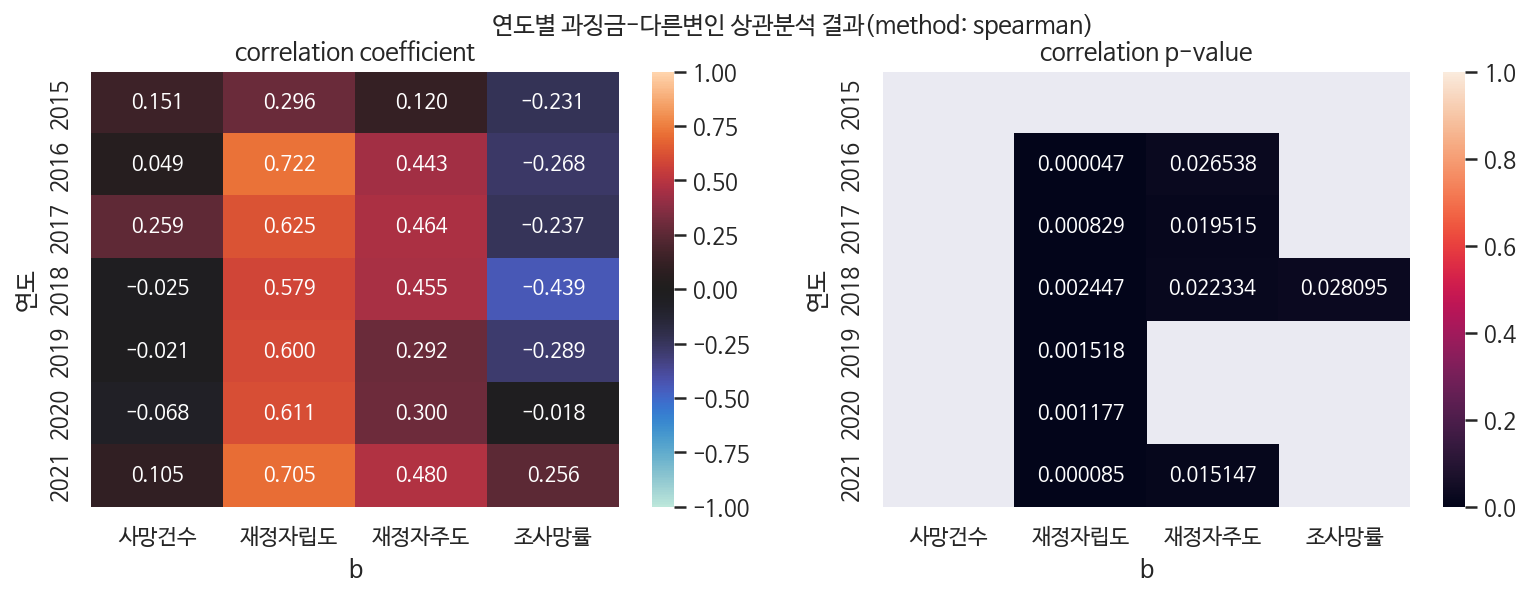

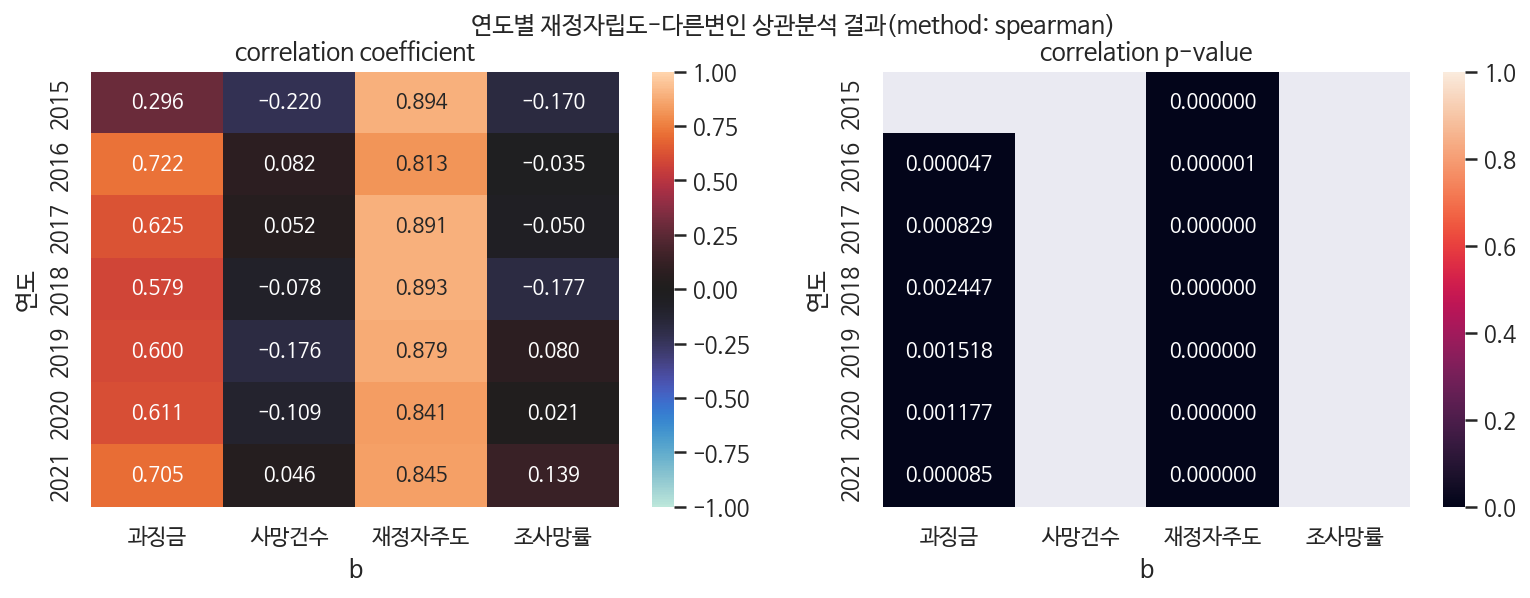

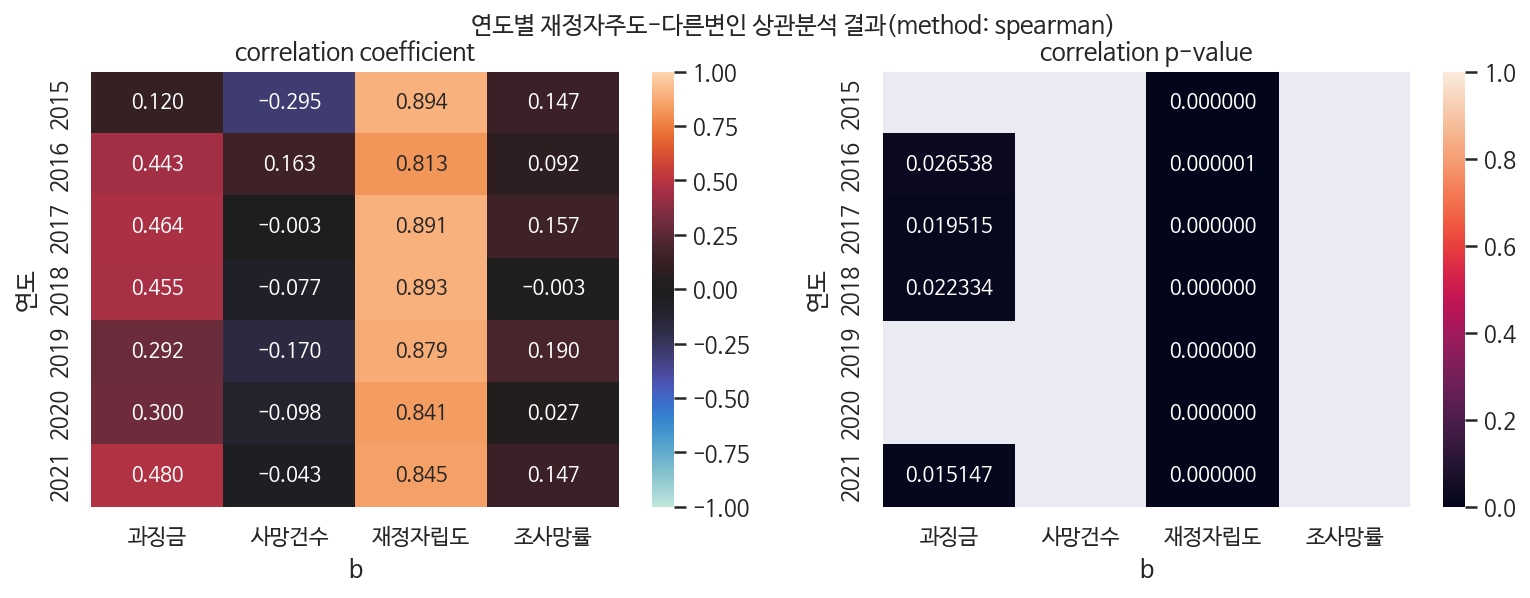

In [ ]:
#spearman 상관분석계수 heatmap화 해보기
#각 변인마다 연도별로 다른 변인과의 상관계수 구하기
from scipy.stats import pearsonr, spearmanr

#상관분석 방법
method = spearmanr


factors = ['사망건수', '조사망률', '과징금', '재정자립도', '재정자주도']
for factor_a in factors:
  df_corr = pd.DataFrame(columns=['연도', 'a', 'b', 'p-value', 'coef'])
  i = 0
  for year in df_data['연도'].unique():
    df_temp = df_data[df_data['연도']==year][:]
    f_ = factors[:]
    f_.remove(factor_a)
    columns = f_
    for colname in columns:
      coef, pvalue = method(df_temp[factor_a], df_temp[colname])
      df_corr.loc[i] = [year, factor_a, colname, pvalue, coef]
      i += 1 
  fig, ax = plt.subplots(1, 2, figsize=(13, 4))
  sns.heatmap(
      ax=ax[0], 
      data=df_corr.pivot('연도', 'b', 'coef'), 
      vmin=-1, 
      vmax=1,
      fmt='.3f',
      annot=True,
      cmap='icefire')
  ax[0].set_title("correlation coefficient")
  df_pval = df_corr.pivot('연도', 'b', 'p-value')
  sns.heatmap(
      ax=ax[1], 
      data=df_pval,
      mask=df_pval > 0.05, #0.05 이상이면 없앰
      vmin=0, 
      vmax=1,
      fmt='.6f', 
      annot=True
      )
  ax[1].set_title("correlation p-value")
  fig.suptitle(f'연도별 {factor_a}-다른변인 상관분석 결과(method: spearman)')
  fig.show()
#스피어만 상관계수에서는 2018년에 유의미한 수치가 나왔음을 확인할 수 있음

# 수정한 가설 : (과징금 및 과태료)data가 서울시 자치구의 재정지표를 대표할 수 있는 지표인가? 
서울 자치구별 사망률과 재정지표는 상관관계가 없었으므로, 가설을 수정하였다. 재정지표와 관련성이 있는 일반회계의 (과징금 및 과태료)data를 선택하였다.



- 재정지표내에서 과징금과 상관관계가 있는 변인이 무엇이 있는지 알기위해 먼저 상관분석을 진행하였다.

In [ ]:
# 재정지표내에서, 과징금과 재정자주도의 상관관계만을 분석한다.
print("과징금 - 재정자주도 상관계수")
print()
print("year : 2015")
print("기각",pearsonr(df_2015["과징금"],df_2015["재정자주도"])[1]) #p값 검증해보기. 
print()
print("year : 2016")
print("기각",pearsonr(df_2016["과징금"],df_2016["재정자주도"])[1])
print()
print("year : 2017")
print(pearsonr(df_2017["과징금"],df_2017["재정자주도"])[1])
print()
print("year : 2018")
print(pearsonr(df_2018["과징금"],df_2018["재정자주도"])[1])
print()
print("year : 2019")
print("기각",pearsonr(df_2019["과징금"],df_2019["재정자주도"])[1])
print()
print("year : 2020")
print("기각",pearsonr(df_2020["과징금"],df_2020["재정자주도"])[1])
print()
print("year : 2021")
print(pearsonr(df_2021["과징금"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 2017,2018,2021 data의 상관계수만 유의하므로, 전체 7개의 연도 중 3개 년도에 대해서만 성립한다. 
#따라서 재정자주도와 과징금은 큰 연관성이 있다고 해석하기 어렵다.

과징금 - 재정자주도 상관계수

year : 2015
기각 0.5743970455510142

year : 2016
기각 0.05174946489343148

year : 2017
0.012133895962451456

year : 2018
0.08047794771951779

year : 2019
기각 0.26708233995788944

year : 2020
기각 0.13753494802409602

year : 2021
0.014326433285347837


In [ ]:
# 재정지표내에서, 과징금과 재정자립도의 상관관계만을 분석한다.
print("과징금 - 재정자립도 상관관계 p-value")
print()
print("year : 2015")
print("기각",pearsonr(df_2015["과징금"],df_2015["재정자립도"])[1]) #p값 검증해보기. 
print()
print("year : 2016")
print(pearsonr(df_2016["과징금"],df_2016["재정자립도"])[1])
print()
print("year : 2017")
print(pearsonr(df_2017["과징금"],df_2017["재정자립도"])[1])
print()
print("year : 2018")
print(pearsonr(df_2018["과징금"],df_2018["재정자립도"])[1])
print()
print("year : 2019")
print(pearsonr(df_2019["과징금"],df_2019["재정자립도"])[1])
print()
print("year : 2020")
print(pearsonr(df_2020["과징금"],df_2020["재정자립도"])[1])
print()
print("year : 2021")
print(pearsonr(df_2021["과징금"],df_2021["재정자립도"])[1])    
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 2015년을 제외한 다른 년도의 data의 상관계수만 유의하므로, 2015년도를 제외한 다른 연도에 대하여 상관분석을 진행한다.

과징금 - 재정자립도 상관관계 p-value

year : 2015
기각 0.7612043588019538

year : 2016
0.00011672104680836239

year : 2017
0.00018200358292320637

year : 2018
0.00030174723955224143

year : 2019
0.0007674827343920012

year : 2020
0.0011252876277969544

year : 2021
6.243512181466953e-06


In [ ]:
# 상관계수 값 추출.
a1 = pearsonr(df_2016["과징금"],df_2016["재정자립도"])[0] 
b1 = pearsonr(df_2017["과징금"],df_2017["재정자립도"])[0] 
c1 = pearsonr(df_2018["과징금"],df_2018["재정자립도"])[0]
d1 = pearsonr(df_2019["과징금"],df_2019["재정자립도"])[0]
e1 = pearsonr(df_2020["과징금"],df_2020["재정자립도"])[0]
f1 = pearsonr(df_2021["과징금"],df_2021["재정자립도"])[0]

In [ ]:
# 2016~2021 년도
df_final = pd.DataFrame({"2016": [round(a1,3)],
                         "2017": [round(b1,3)],
                         "2018": [round(c1,3)],
                         "2019": [round(d1,3)],
                         "2020": [round(e1,3)],
                         "2021": [round(f1,3)]},
                         index=['재정자립도'])
df_final
# 연도별 과징금과 재정자립도의 상관계수 데이터프레임
# 모든 상관계수가 0.6보다 크므로 데이터는 커다란 연관성이 있다고 해석할 수 있다.
     

2016  2017   2018   2019   2020   2021
재정자립도  0.695  0.68  0.663  0.628  0.613  0.772

과징금data와 재정자립도간에 상관관계가 있는 것으로 확인이 되었다.
따라서 한강 남쪽에 있는 서울시 자치구, 한강 북쪽에 있는 서울시 자치구를 각각 병합하여 분석을 진행해 보았다.

In [ ]:
# 남쪽전체 및 북쪽전체 의 과징금과 재정자립도 간의 관계 분석
# 서울 북쪽에 있는 구 전체병합, 남쪽에 있는 구 전체병합
#강북: 은평구,마포구,서대문구,종로구,중구,용산구,성북구,강북구,도봉구,노원구,동대문구,성동구,중랑구,광진구 2
#강남 : 강서구, 양천구,구로구,영등포구,금천구,동작구,관악구,서초구,강남구,송파구,강동구 1

df_sn = df_data
for gu in df_data["자치구별"].unique():
  if(gu == "강서구" or gu == "양천구" or gu == "구로구" or gu == "영등포구" or gu == "금천구" or gu == "동작구" or gu == "관악구" or gu == "서초구" or gu == "강남구" or gu == "송파구" or gu == "강남구" or gu == "강동구"):    
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 1
  else:
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 2

In [ ]:
df_sn

연도 자치구별    사망건수      조사망률       과징금     재정자립도     재정자주도    강
0    2015  종로구   829.0  1.704748  8.547528  3.912023  4.172848  2.0
1    2016  종로구   823.0  1.704748  8.983565  4.070735  4.141546  2.0
2    2017  종로구   826.0  1.722767  7.974189  3.691376  4.005513  2.0
3    2018  종로구   897.0  1.791759  7.803843  3.540959  4.010963  2.0
4    2019  종로구   854.0  1.757858  7.437206  3.310543  4.021774  2.0
..    ...  ...     ...       ...       ...       ...       ...  ...
170  2017  강동구  1877.0  1.458615  8.760767  2.980619  3.819908  1.0
171  2018  강동구  1905.0  1.504077  8.750841  4.063885  4.117410  1.0
172  2019  강동구  1898.0  1.504077  8.839422  4.005513  4.025352  1.0
173  2020  강동구  1901.0  1.458615  9.298168  3.683867  3.830813  1.0
174  2021  강동구  2122.0  1.547563  8.232174  3.284664  3.860730  1.0

[175 rows x 8 columns]

Text(0.5, 1.0, '강남구 과징금 히스토그램')

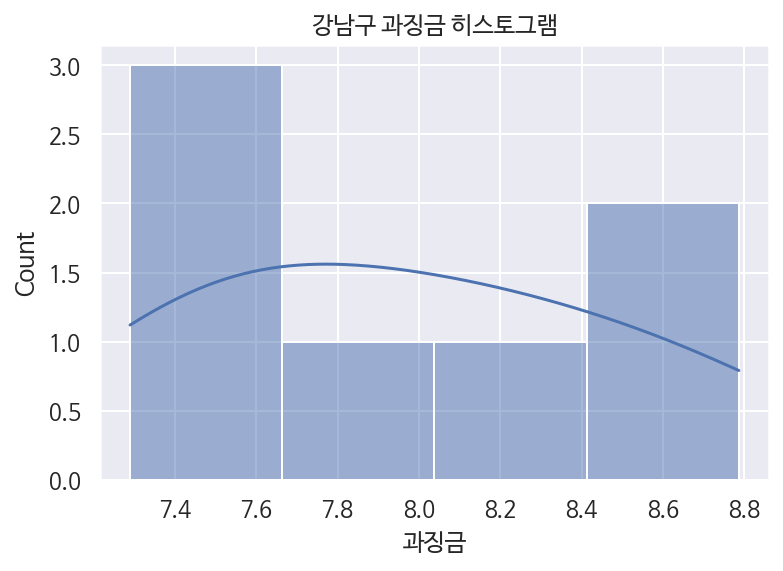

In [ ]:
sns.histplot(data=df_sn[df_sn['자치구별']=='강남구']['과징금'], kde=True)
plt.title('강남구 과징금 히스토그램')

Text(0.5, 1.0, '강북구 과징금 히스토그램')

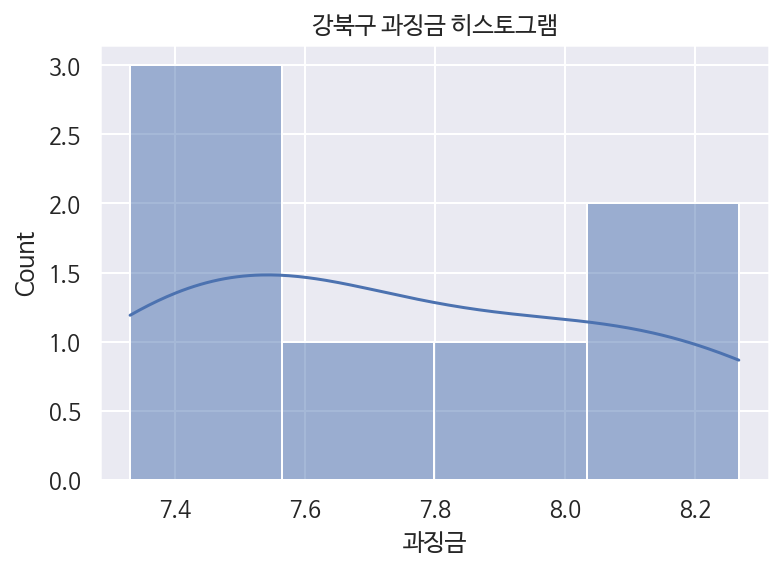

In [ ]:
sns.histplot(data=df_sn[df_sn['자치구별']=='강북구']['과징금'], kde=True)
plt.title('강북구 과징금 히스토그램')

In [ ]:
df_sn["연도"] = df_sn["연도"].apply(float)
South = df_sn[df_sn["강"]==1]
North = df_sn[df_sn["강"]==2]

South2016 = South[South['연도']==2016]
South2017 = South[South['연도']==2017]
South2018 = South[South['연도']==2018] 
South2019 = South[South['연도']==2019]
South2020 = South[South['연도']==2020]
South2021 = South[South['연도']==2021]


North2016 = North[North['연도']==2016]
North2017 = North[North['연도']==2017]
North2018 = North[North['연도']==2018] 
North2019 = North[North['연도']==2019]
North2020 = North[North['연도']==2020]
North2021 = North[North['연도']==2021]

print(South2017)

         연도  자치구별    사망건수      조사망률       과징금     재정자립도     재정자주도    강
100  2017.0   양천구  1805.0  1.335001  8.692322  3.858622  4.152613  1.0
107  2017.0   강서구  2574.0  1.481605  7.914983  2.975530  3.837299  1.0
114  2017.0   구로구  1749.0  1.458615  8.074026  3.198673  3.871201  1.0
121  2017.0   금천구  1167.0  1.609438  9.047468  3.975936  4.075841  1.0
128  2017.0  영등포구  1560.0  1.458615  8.003029  3.487375  3.979682  1.0
135  2017.0   동작구  1641.0  1.435085  7.327781  2.760010  3.718438  1.0
142  2017.0   관악구  2068.0  1.435085  7.757479  3.206803  3.910021  1.0
149  2017.0   서초구  1446.0  1.193922  8.491055  3.269569  3.887730  1.0
156  2017.0   강남구  1756.0  1.163151  8.435332  2.901422  3.742420  1.0
163  2017.0   송파구  2239.0  1.223775  8.371705  3.465736  3.883624  1.0
170  2017.0   강동구  1877.0  1.458615  8.760767  2.980619  3.819908  1.0


In [ ]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#강북, 강남 data 정규성 검정  
print("year : 2016")
print("강남 과징금",shapiro(South2016["과징금"]))
print("강남 재정자립도",shapiro(South2016["재정자립도"]))
print("강북 과징금",shapiro(North2016["과징금"]))
print("강북 재정자립도",shapiro(North2016["재정자립도"]))
print()
print("year : 2017")
print("강남 과징금",shapiro(South2017["과징금"]))
print("강남 재정자립도",shapiro(South2017["재정자립도"]))
print("강북 과징금",shapiro(North2017["과징금"]))
print("강북 재정자립도",shapiro(North2017["재정자립도"]))
print()
print("year : 2018")
print("강남 과징금",shapiro(South2018["과징금"]))
print("강남 재정자립도",shapiro(South2018["재정자립도"]))
print("강북 과징금",shapiro(North2018["과징금"]))
print("강북 재정자립도",shapiro(North2018["재정자립도"]))
print()
print("year : 2019")
print("강남 과징금",shapiro(South2019["과징금"]))
print("강남 재정자립도",shapiro(South2019["재정자립도"]))
print("강북 과징금",shapiro(North2019["과징금"]))
print("강북 재정자립도",shapiro(North2019["재정자립도"]))
print()
print("year : 2020")
print("강남 과징금",shapiro(South2020["과징금"]))
print("강남 재정자립도",shapiro(South2020["재정자립도"]))
print("강북 과징금",shapiro(North2020["과징금"]))
print("강북 재정자립도",shapiro(North2020["재정자립도"]))
print()
print("year : 2021")
print("강남 과징금",shapiro(South2021["과징금"]))
print("강남 재정자립도",shapiro(South2021["재정자립도"]))
print("강북 과징금",shapiro(North2021["과징금"]))
print("강북 재정자립도",shapiro(North2021["재정자립도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  변수가 정규성을 만족해야 피어슨 검정 가능

year : 2016
강남 과징금 ShapiroResult(statistic=0.9305750131607056, pvalue=0.41670024394989014)
강남 재정자립도 ShapiroResult(statistic=0.9253231883049011, pvalue=0.3654956817626953)
강북 과징금 ShapiroResult(statistic=0.8997544050216675, pvalue=0.11186227947473526)
강북 재정자립도 ShapiroResult(statistic=0.9280315637588501, pvalue=0.2862890362739563)

year : 2017
강남 과징금 ShapiroResult(statistic=0.983284056186676, pvalue=0.9816495776176453)
강남 재정자립도 ShapiroResult(statistic=0.9385563135147095, pvalue=0.5036783814430237)
강북 과징금 ShapiroResult(statistic=0.9747298359870911, pvalue=0.9327000975608826)
강북 재정자립도 ShapiroResult(statistic=0.9246373772621155, pvalue=0.2562384009361267)

year : 2018
강남 과징금 ShapiroResult(statistic=0.9510337114334106, pvalue=0.657187819480896)
강남 재정자립도 ShapiroResult(statistic=0.8797287940979004, pvalue=0.10322417318820953)
강북 과징금 ShapiroResult(statistic=0.9632096886634827, pvalue=0.7753962874412537)
강북 재정자립도 ShapiroResult(statistic=0.9707696437835693, pvalue=0.8867824077606201)

year : 2019


In [ ]:
print("강남 과징금-재정자립도 상관관계 p-value")
print("year : 2016")
print("기각 :",pearsonr(South2016["과징금"],South2016["재정자립도"])) #p값 검증해보기. 
print()
print("year : 2017")
print(pearsonr(South2017["과징금"],South2017["재정자립도"]))
print()
print("year : 2018")
print(pearsonr(South2018["과징금"],South2018["재정자립도"]))
print()
print("year : 2019")
print(pearsonr(South2019["과징금"],South2019["재정자립도"]))
print()
print("year : 2020")
print("기각 :",pearsonr(South2020["과징금"],South2020["재정자립도"]))
print()
print("year : 2021")
print(pearsonr(South2021["과징금"],South2021["재정자립도"]))
print()
print()
print("강북 과징금-재정자립도 상관관계 p-value")
print("year : 2016")
print(pearsonr(North2016["과징금"],North2016["재정자립도"])) #p값 검증해보기. 
print()
print("year : 2017")
print(pearsonr(North2017["과징금"],North2017["재정자립도"]))
print()
print("year : 2018")
print("기각 :",pearsonr(North2018["과징금"],North2018["재정자립도"]))
print()
print("year : 2019")
print("기각 :",pearsonr(North2019["과징금"],North2019["재정자립도"]))
print()
print("year : 2020")
print(pearsonr(North2020["과징금"],North2020["재정자립도"]))
print()
print("year : 2021")
print(pearsonr(North2021["과징금"],North2021["재정자립도"]))

# (상관계수값, p값) 이 출력됨.   
# p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 강북의 경우는 2018년, 2019년을 제외한 연도에서 유의, 강남에서는 2016년, 2020년에을 제외한 연도만 상관계수가 유의하므로, 
# 15년을 제외한 서울 전체구 / 15,18년을 제외한 강북구 / 15,16,20년을 제외한 강남구에 대한 회귀분석을 진행한다.

강남 과징금-재정자립도 상관관계 p-value
year : 2016
기각 : (0.580583135776356, 0.06109938308142635)

year : 2017
(0.6133776027239575, 0.044754308442083966)

year : 2018
(0.7896060498144329, 0.0038445046161927955)

year : 2019
(0.820191895544377, 0.001987618155868737)

year : 2020
기각 : (0.33785095478257177, 0.3095541399640903)

year : 2021
(0.7869582481241983, 0.00405037871939038)


강북 과징금-재정자립도 상관관계 p-value
year : 2016
(0.8709444329162109, 5.0224263577745397e-05)

year : 2017
(0.7783708508413181, 0.001041238183967234)

year : 2018
기각 : (0.5144818906429304, 0.059793753315837715)

year : 2019
기각 : (0.4799643151283759, 0.08240415628149904)

year : 2020
(0.9118688989245763, 5.582143334103989e-06)

year : 2021
(0.773900612305421, 0.0011615282445139943)


## 상관 분석 결과 :

1. 강북의 경우는 2018년, 2019년을 제외한 연도에서 유의, 강남에서는 2016년, 2020년을 제외한 연도만 상관계수가 유의하므로, .
2.  15년을 제외한 서울 전체구 / 15,18년을 제외한 강북구 / 15,16,20년을 제외한 강남구에 대한 회귀분석을 진행한다.



# 단순선형 회귀분석 : 재정자립도와 과징금간의 회귀분석진행


## 가설 설정 : 
 귀무가설 : 과징금data와 재정자립도간의 통계적인 인과관계가 없다.

---


 대립가설 : 과징금data와 재정자립도간의 통계적인 인과관계가 있다.


## 회귀 분석 조건 확인

1.   Linearity (만족)
2.   Nearly normal residuals (만족)
3.   Constant variability (만족)





## 회귀 분석 진행 및 결과 정리

In [ ]:
import statsmodels.api as sm


for year in df_data["연도"].unique():
  if(year != 2015):
    df_temp = df_data[df_data["연도"]==year]    
    model1 = sm.OLS(df_temp["재정자립도"], df_temp["과징금"])    
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' +"서울 전체 구"+str(year) + '\033[0m')
    print(fitted_model1.summary())
    
df_south = df_sn[df_sn["강"]==1]
df_north = df_sn[df_sn["강"]==2]

for year in df_south["연도"].unique():
  
  if(year == 2017 or year == 2018 or year == 2019 or year ==2021):
    df_temp = df_south[df_south["연도"]==year]
    model1 = sm.OLS(df_temp["재정자립도"], df_temp["과징금"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' +"강남구"+ str(year) + '\033[0m')
    print(fitted_model1.summary())

  model1 = sm.OLS(df_north["재정자립도"], df_north["과징금"])
  fitted_model1=model1.fit()
  print("-"*78)
  print(" ")
  print(" "*35,'\033[1m' +"강북구"+ '\033[0m')
  print(fitted_model1.summary())


for year in df_north["연도"].unique():
  
  if(year != 2015 and year != 2018 and year != 2019):
    df_temp = df_north[df_north["연도"]==year]
    model1 = sm.OLS(df_temp["재정자립도"], df_temp["과징금"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' +"강북구"+ str(year) + '\033[0m')
    print(fitted_model1.summary())

    # 종속변수 : 재정자립도 / 독립변수 : 과징금 및 과태료

------------------------------------------------------------------------------
 
                                    서울 전체 구2016.0
                                 OLS Regression Results                                
Dep. Variable:                  재정자립도   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3468.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    1.80e-27
Time:                        01:45:47   Log-Likelihood:                         -3.6367
No. Observations:                  25   AIC:                                      9.273
Df Residuals:                      24   BIC:                                      10.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                        

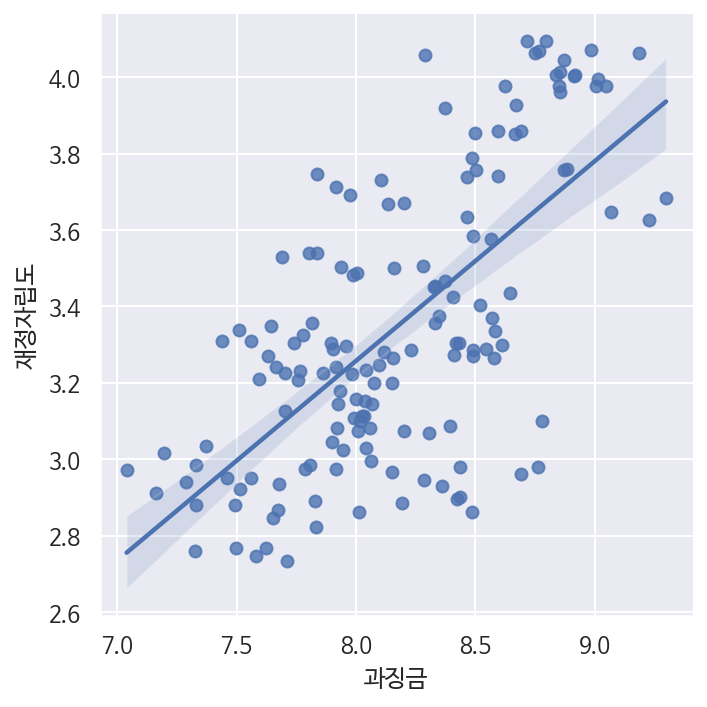

In [ ]:
#서울 전체 구 회귀분석 그래프
df_temp = df_data[df_data["연도"]!=2015]    
sns.lmplot(x="과징금", y="재정자립도", data=df_temp)

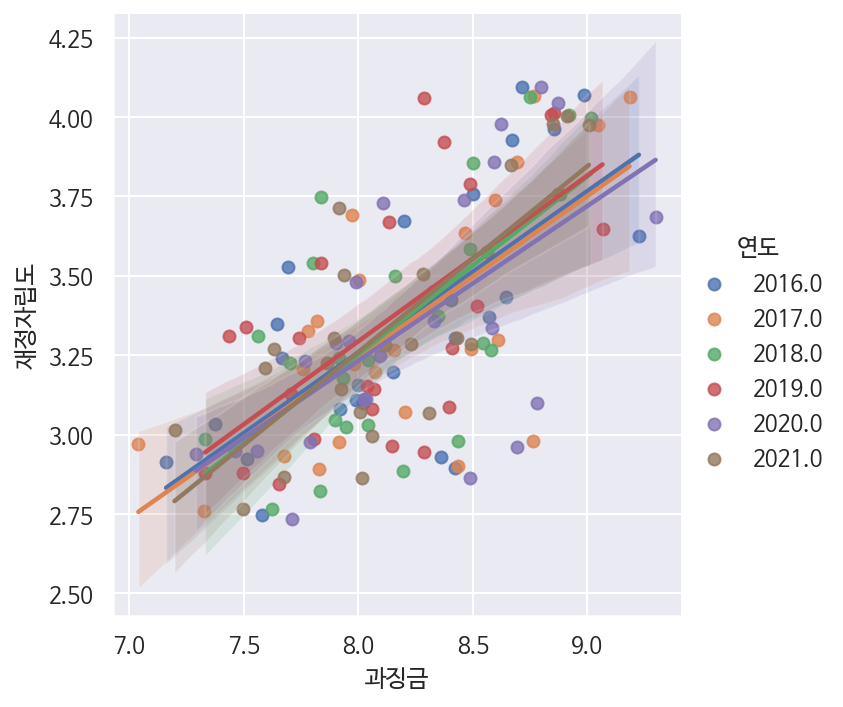

In [ ]:
#서울 전체 구 연도별 회귀분석 그래프
df_temp = df_data[df_data["연도"]!=2015]    
sns.lmplot(x="과징금", y="재정자립도", hue ="연도", data=df_temp)

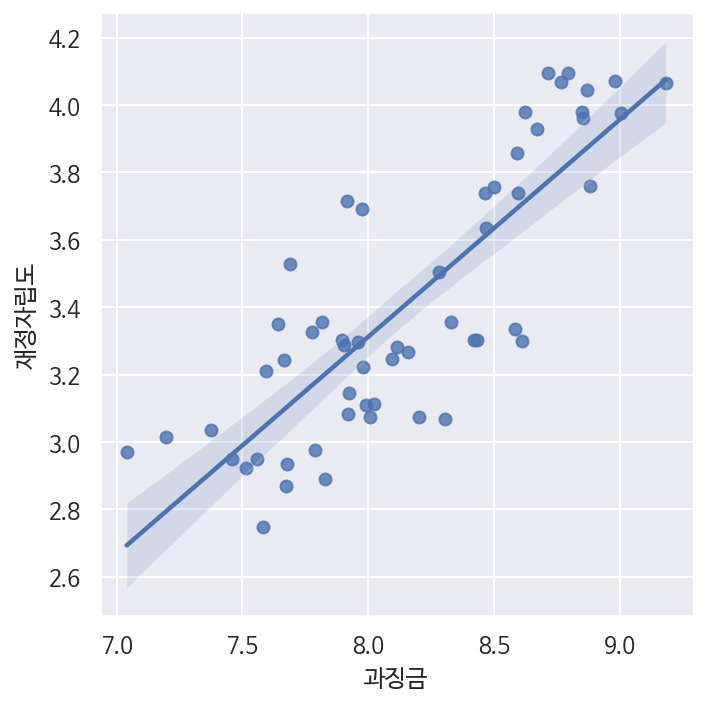

In [ ]:
#강북구 회귀분석 그래프
for year in df_north["연도"].unique():
  if(year == 2015 or year == 2018 or year == 2019):
    df_north.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_north.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자립도",data=df_north[df_north['회귀']==1])

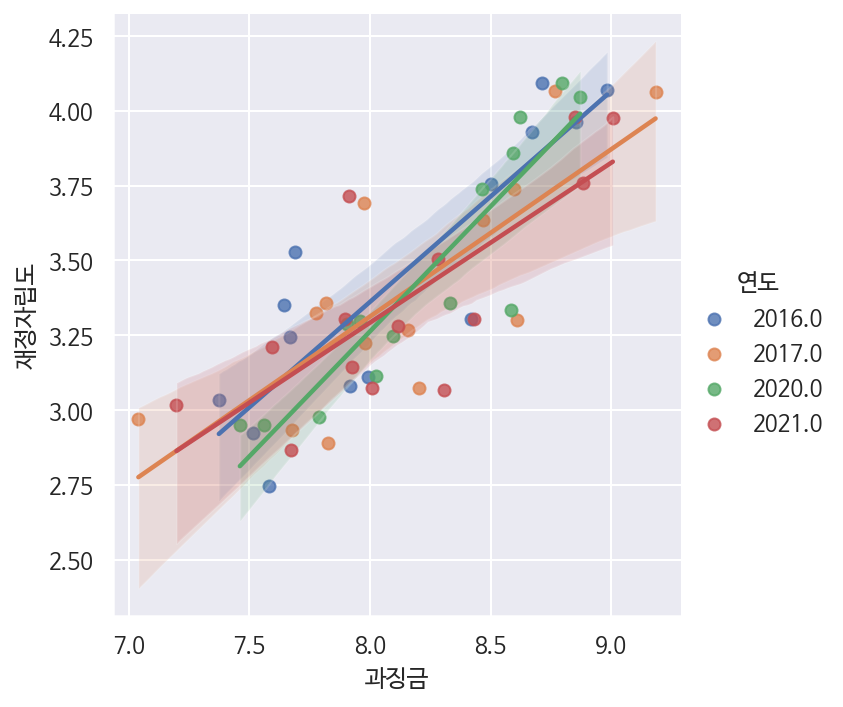

In [ ]:
#강북구 연도별 회귀분석 그래프
for year in df_north["연도"].unique():
  if(year == 2015 or year == 2018 or year == 2019):
    df_north.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_north.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자립도", hue ="연도",data=df_north[df_north['회귀']==1])

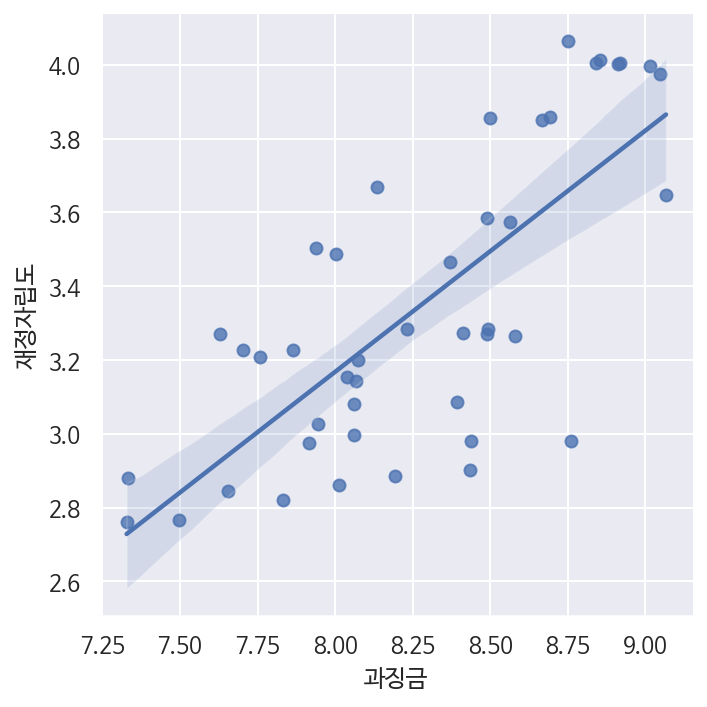

In [ ]:
#강남구 회귀분석 그래프
for year in df_south["연도"].unique():
  if(year == 2015 or year == 2016 or year ==2020):
    df_south.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_south.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자립도", data=df_south[df_south['회귀']==1])

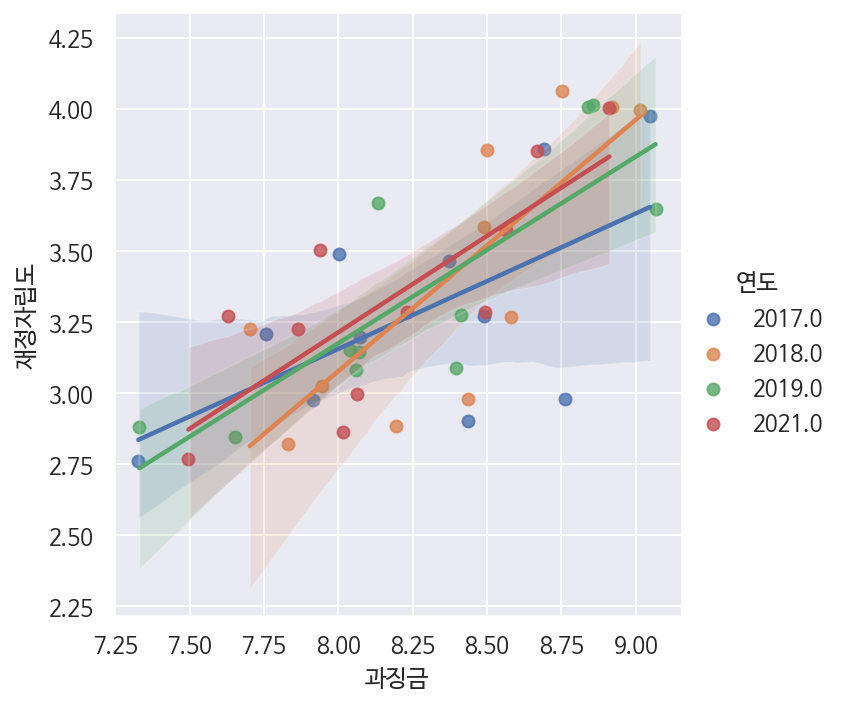

In [ ]:
#강남구 연도별 회귀분석 그래프
for year in df_south["연도"].unique():
  if(year == 2015 or year == 2016 or year ==2020):
    df_south.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_south.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자립도", hue ="연도", data=df_south[df_south['회귀']==1])

# 결론 : 과징금data와 재정자립도간의 통계적인 인과관계가 있음.
1. 회귀분석 결과 adj R^2 > 0.99 이므로, 귀무가설을 기각한다.
2. 서울시의 과징금 및 과태료 data는 재정자립도를 대표할 수 있는 지표이다. (통계적인 유의성을 말할 수 있다.)




